In [1]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Activation, Dense
from tensorflow.keras.models import Sequential
from feature_engine.encoding import OrdinalEncoder
from sklearn.model_selection import KFold
from keras import optimizers
import pickle

In [2]:
print(tensorflow.__version__)

2.10.0


### Master Data, Climate, Labor, Productivity and Satellite Images Indexes Pandas Dataframe

In [3]:
raw_df = pd.read_csv(r'C:\Users\sbarrios\OneDrive - Universidad Galileo\Data Science\Python\Proyectos\Pruebas\Pantaleon\Optimizador Cosecha\NI_DatosModeloBPP.csv')
raw_df

,Unnamed: 0,ZAFRA,IDCOMP,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,...,HUMEDAD_PRODUCTO_CORE,Brix,Pol,Pureza,Jugo,Humedad,Fibra,Redimiento,Muestras,Fuente
0,0,22-23,204791,ABR,MECANICO,5.650000,CG02-163,47.259998,10.0,TRINEXAPAC,...,70.62825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,22-23,204791,ABR,MECANICO,5.650000,CG02-163,47.259998,10.0,TRINEXAPAC,...,70.62825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,22-23,204791,ABR,MECANICO,5.650000,CG02-163,47.259998,10.0,TRINEXAPAC,...,70.62825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,22-23,204791,ABR,MECANICO,5.650000,CG02-163,47.259998,10.0,TRINEXAPAC,...,70.62825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,22-23,204791,ABR,MECANICO,5.650000,CG02-163,47.259998,10.0,TRINEXAPAC,...,70.62825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249265,249265,22-23,201801,MAY,MECANICO,24.379999,CG02-163,123.550003,11.0,GLIFOSATO,...,69.98000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249266,249266,22-23,201801,MAY,MECANICO,24.379999,CG02-163,123.550003,11.0,GLIFOSATO,...,69.98000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249267,249267,22-23,201801,MAY,MECANICO,24.379999,CG02-163,123.550003,11.0,GLIFOSATO,...,69.98000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249268,249268,22-23,201801,MAY,MECANICO,24.379999,CG02-163,123.550003,11.0,GLIFOSATO,...,69.98000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sample Based Filtering
Since not all observations have a "Brix", "Pol" or "Purity" sample associated, we remove the observations with NULL values on the previously mentioned targets.

These samples include the "pre-application", "pre-harvest" and "core sampler" phases. Since the targets are measured at the factory, we only use "core sampler" samples.

In [4]:
df = raw_df[(raw_df['Brix'].notnull()) & (raw_df['Fuente']=='CORE')]
df = df.drop("Unnamed: 0",axis=1)
df

,ZAFRA,IDCOMP,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,DOSIS_PRODUCTO,...,HUMEDAD_PRODUCTO_CORE,Brix,Pol,Pureza,Jugo,Humedad,Fibra,Redimiento,Muestras,Fuente
55,20-21,204791,ABR,MANUAL,5.650000,CP88-1165,68.070000,0.0,MADUREZ NATURAL,MADUREZ NATURAL-0,...,70.10033,17.330000,14.635000,84.435000,66.870000,NaN,NaN,117.945000,6.0,CORE
484,19-20,200571,ENE,MECANICO,17.030001,CP72-2086,119.419998,0.0,PROTECTANTE,PROTECTANTE-0,...,71.46150,17.592000,15.028000,85.416000,NaN,NaN,14.116,122.618000,5.0,CORE
559,19-20,200571,ENE,MECANICO,17.030001,CP72-2086,119.419998,0.0,PROTECTANTE,PROTECTANTE-0,...,71.46150,17.592000,15.028000,85.416000,NaN,NaN,14.116,122.618000,5.0,CORE
761,22-23,200094,DIC,MECANICO,5.220000,CG00-102,119.510002,12.0,GLIFOSATO,GLIFOSATO-12,...,71.16627,16.480000,13.770000,83.580000,67.360000,NaN,NaN,112.760000,1.0,CORE
762,22-23,200094,DIC,MECANICO,5.220000,CG00-102,119.510002,12.0,GLIFOSATO,GLIFOSATO-12,...,71.16627,16.480000,13.770000,83.580000,67.360000,NaN,NaN,112.760000,1.0,CORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249012,22-23,200907,ABR,MECANICO,23.170000,CG02-163,112.230003,12.0,TRINEXAPAC,TRINEXAPAC-12,...,70.70923,17.906250,15.382500,85.879375,69.542500,NaN,NaN,126.766875,16.0,CORE
249105,22-23,210173,MAR,MECANICO,23.320000,CG02-163,105.760002,13.0,TRINEXAPAC,TRINEXAPAC-13,...,70.80270,17.731429,15.227143,85.848571,67.368571,NaN,NaN,124.691429,7.0,CORE
249143,22-23,210173,MAR,MECANICO,23.320000,CG02-163,105.760002,13.0,TRINEXAPAC,TRINEXAPAC-13,...,70.80270,17.137778,14.670000,85.554444,68.042222,NaN,NaN,120.688889,9.0,CORE
249196,22-23,201801,MAY,MECANICO,24.379999,CG02-163,123.550003,11.0,GLIFOSATO,GLIFOSATO-11,...,69.98000,18.038182,15.510455,85.953182,69.401818,NaN,NaN,127.696818,22.0,CORE


### Categorical Variables Encoding
All categorical variables are transformed for use in the ANN.
Also, all time related variables are removed from the dataset.

In [5]:
od = OrdinalEncoder(encoding_method='arbitrary')
od.fit(df)
final_df = od.transform(df)
final_df.drop(["FECHA_CORTE","FECHA_IMG","fecha_aplicacion","FECHA_INICIO_CICLO","ZAFRA","IDCOMP"],axis=1,inplace=True)
pickle.dump(od, open(r'.\Models\NI_categorical_encoder.pkl', 'wb'))

### Design Matrix "X"

In [6]:
# Features and Target
X = final_df.drop(['Pol', 'Brix', 'Pureza','Jugo','Humedad','Fibra','Redimiento','Muestras','Fuente'], axis=1)
X.head()

,MES,TIPO_COSECHA,AREA_COSECHADA,VARIEDAD,TCH_REAL,DOSIS,PRODUCTO,DOSIS_PRODUCTO,ALTITUD,TIPO_RIEGO,...,NDVI_POND15,AGUA_POND15,HUMEDAD_AVG15,NDVI_POND1630,AGUA_POND1630,HUMEDAD_AVG1630,NDVI_POND30,AGUA_POND30,HUMEDAD_AVG30,HUMEDAD_PRODUCTO_CORE
55,0,0,5.650000,0,68.070000,0.0,0,0,0,0,...,0.45275,0.02268,70.44441,0.63460,0.03004,69.24940,0.66068,0.03596,70.38000,70.10033
484,1,1,17.030001,1,119.419998,0.0,1,1,1,1,...,0.75358,0.04828,54.70075,0.81149,0.05491,73.07183,0.78825,0.05005,48.97825,71.46150
559,1,1,17.030001,1,119.419998,0.0,1,1,1,1,...,0.75358,0.04828,54.70075,0.81149,0.05491,73.07183,0.78825,0.05005,48.97825,71.46150
761,2,1,5.220000,2,119.510002,12.0,2,2,1,0,...,0.74945,0.06904,71.75769,0.76094,0.07800,72.54649,0.78985,0.07262,72.63697,71.16627
762,2,1,5.220000,2,119.510002,12.0,2,2,1,0,...,0.76112,0.07015,71.87957,0.72000,0.08202,72.72800,0.80986,0.07320,72.67640,71.16627


### Standarization

In [7]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
pickle.dump(scaler, open(r'.\Models\NI_scaler.pkl', 'wb'))

## Brix Model

### Target "Brix", Train / Test Split and Cross Validation

In [8]:
y = final_df['Brix']
X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, test_size=0.3, random_state=42)

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

num_folds = 10

# Define per-fold score containers
brix_mae_per_fold = []
brix_loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
60/60 [==============================] - 1s 4ms/step - loss: 293.9517 - mae: 17.1120 - val_loss: 269.5350 - val_mae: 16.3841
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 238.8096 - mae: 15.4079 - val_loss: 206.0572 - val_mae: 14.3164
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 170.5141 - mae: 12.9965 - val_loss: 134.6434 - val_mae: 11.5562
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 100.4158 - mae: 9.9242 - val_loss: 67.8788 - val_mae: 8.1720
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 41.5671 - mae: 6.2830 - val_loss: 19.6045 - val_mae: 4.3019
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 7.8038 - mae: 2.4273 - val_loss: 1.4574 - val_mae: 0.9528
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 1.0120 - mae: 0.7967 - val_l

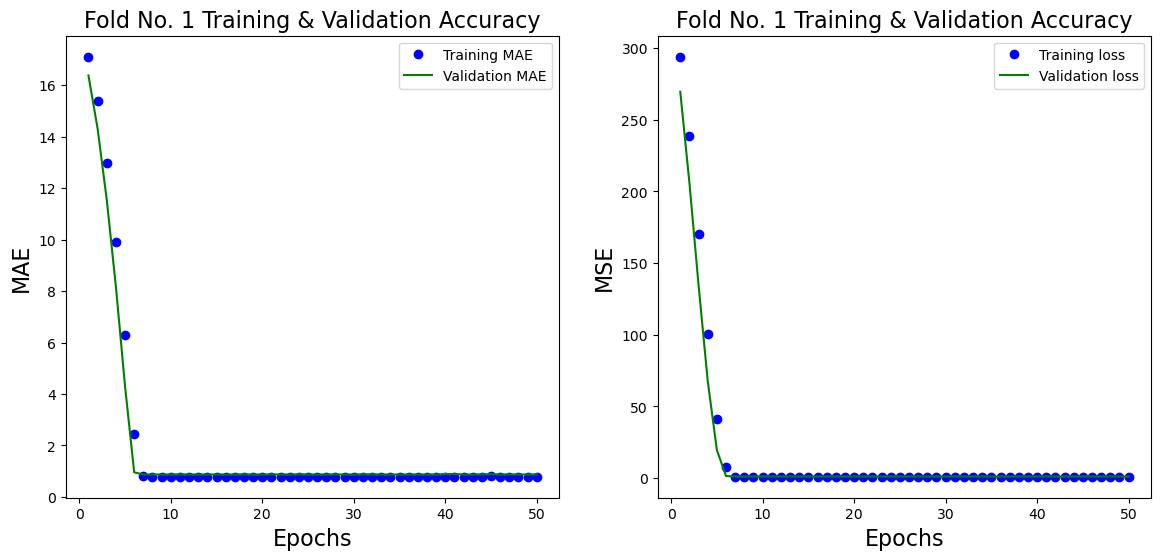

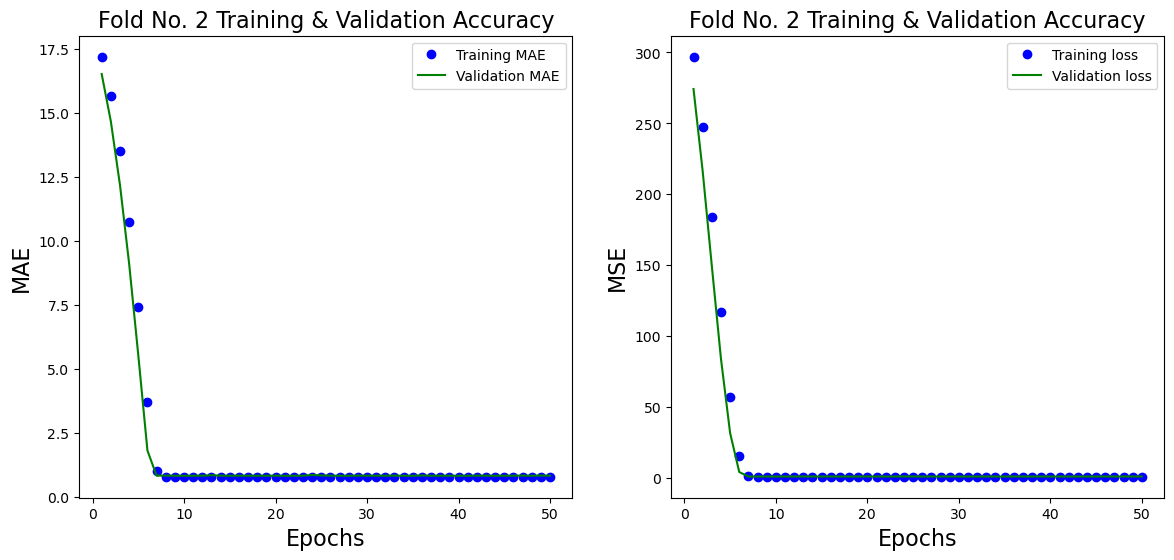

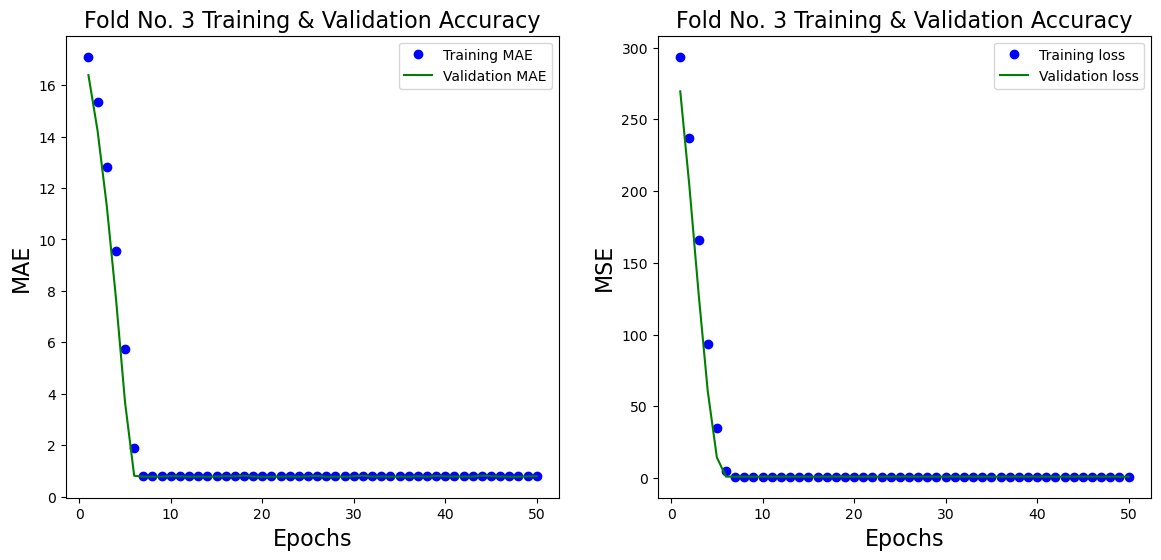

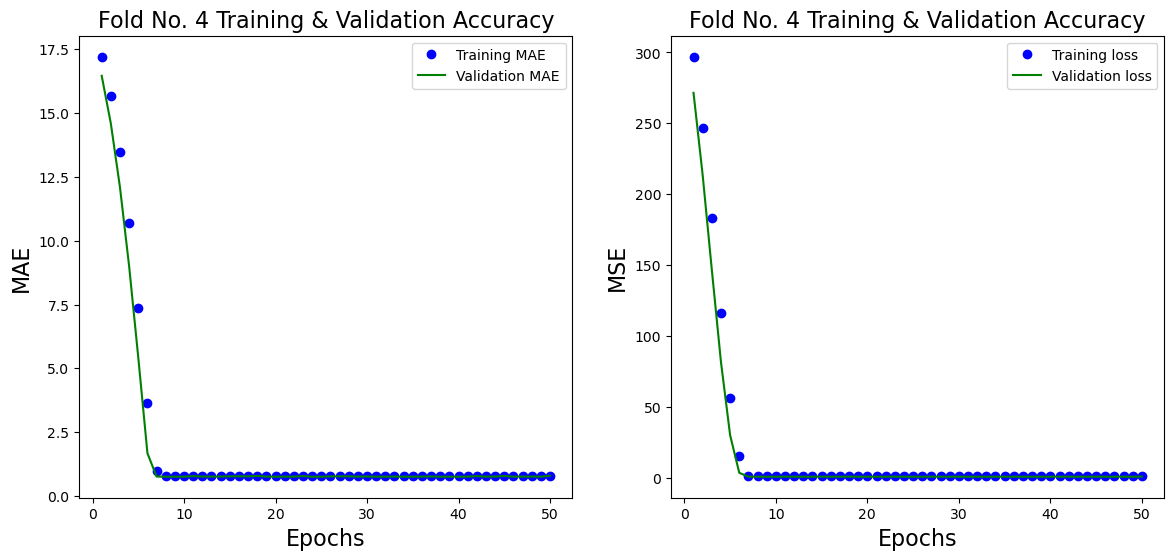

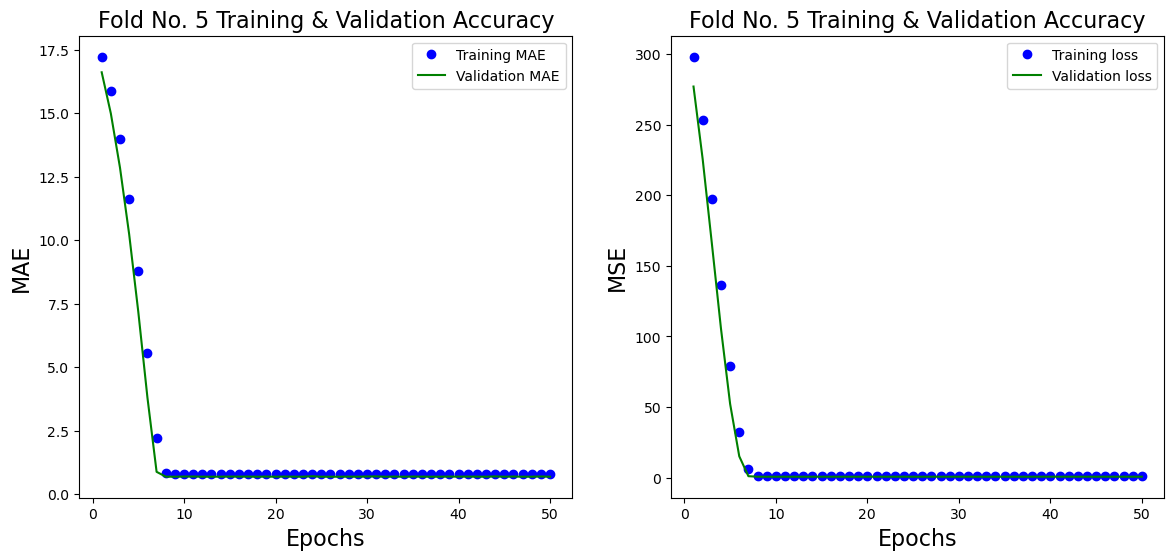

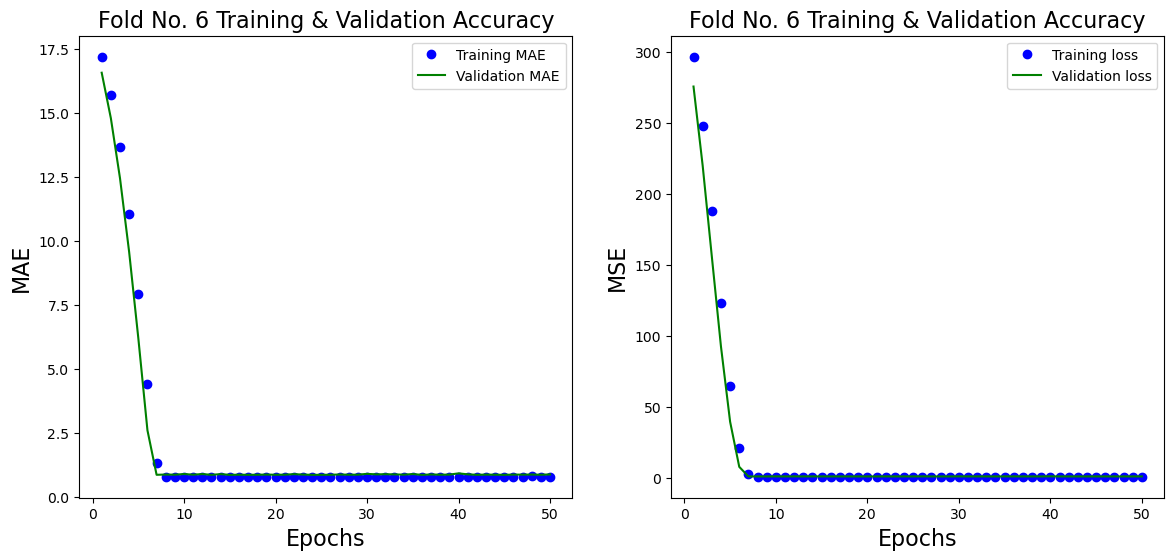

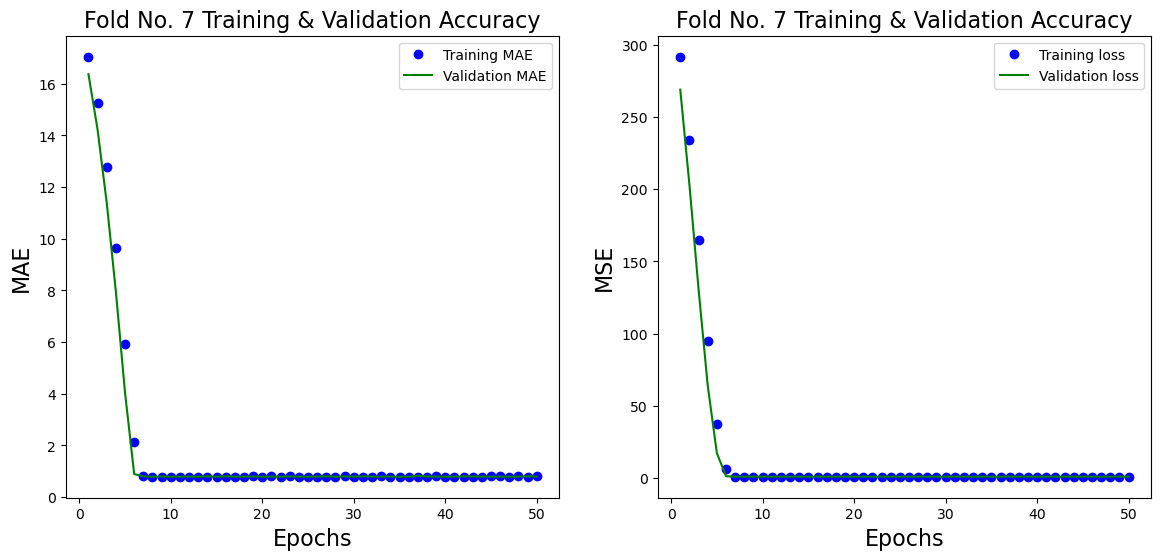

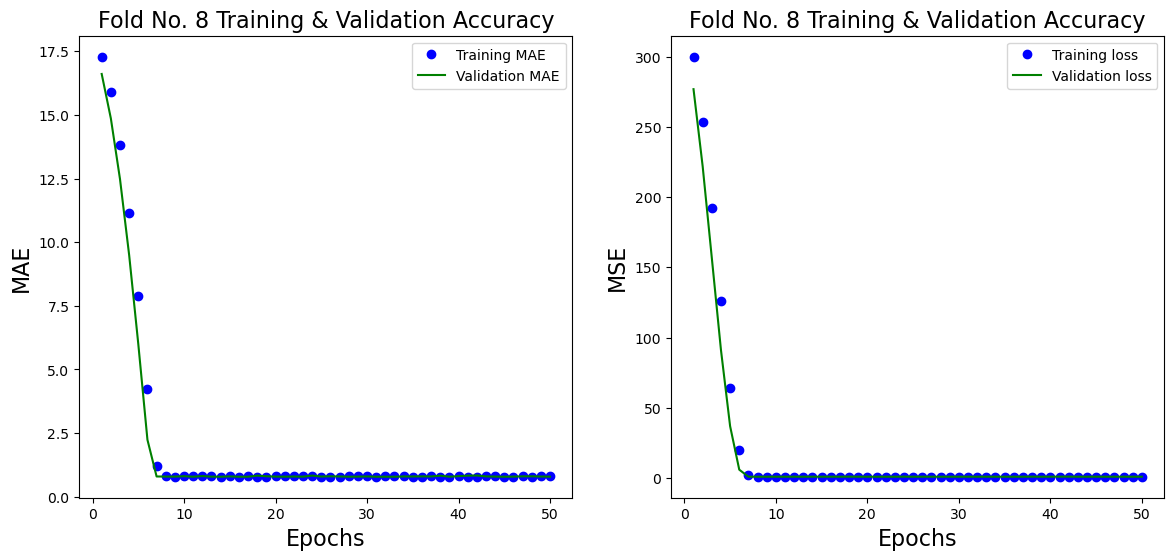

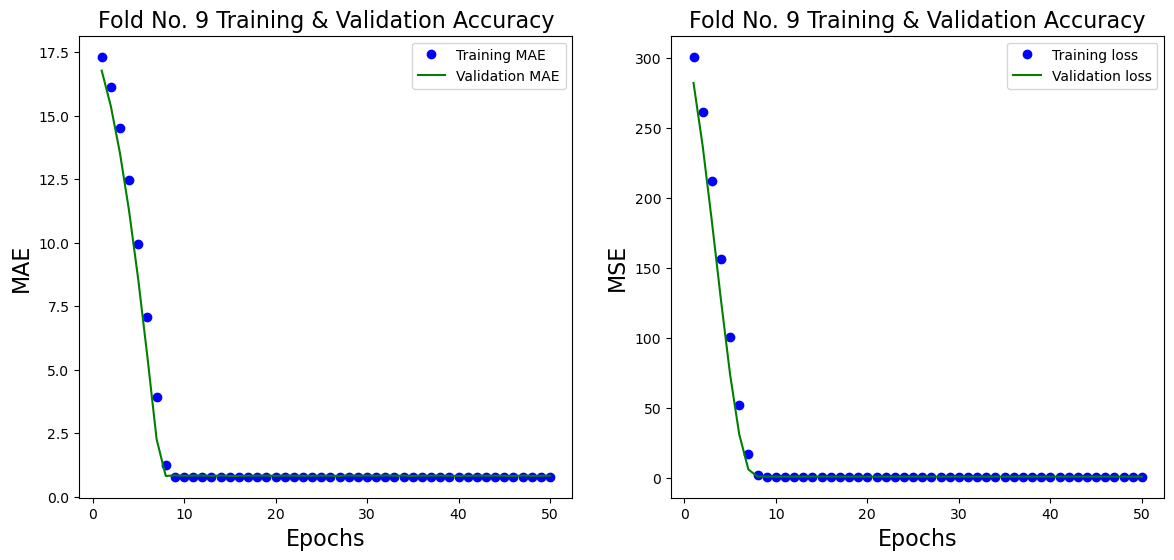

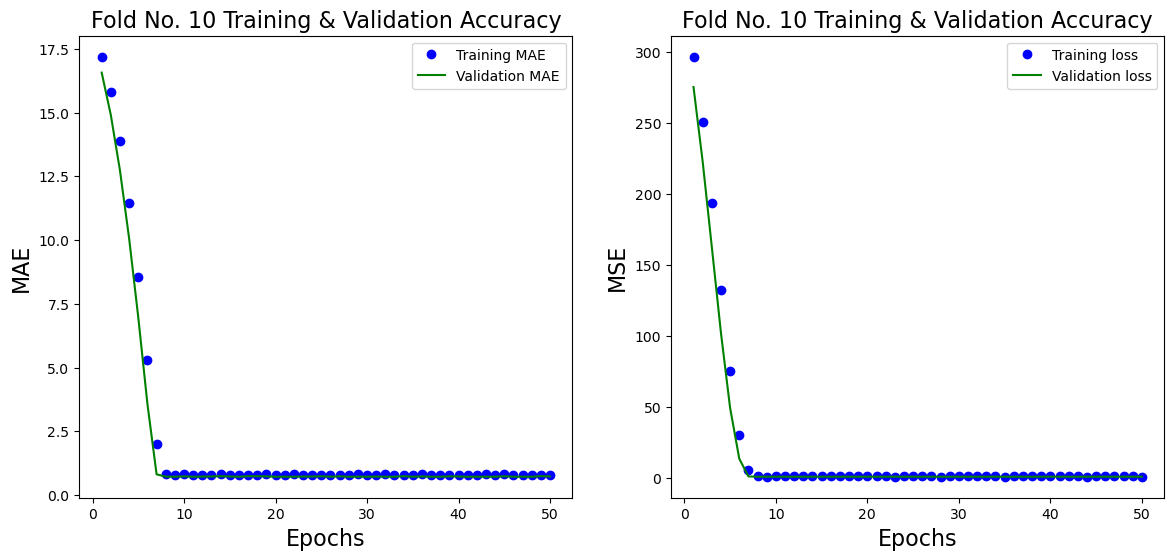

In [9]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the Keras model
    brix_model = Sequential()
    brix_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
    brix_model.add(Dense(20, activation='relu'))
    brix_model.add(Dense(1))

    # Compile model
    brix_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.003),
                loss='mse',
                metrics=['mae'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the network
    brix_model_history = brix_model.fit(inputs[train], targets[train],
                        validation_data=(inputs[test], targets[test]),
                        epochs=50,
                        batch_size=20)

    # Generate generalization metrics
    brix_scores = brix_model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {brix_model.metrics_names[0]} of {brix_scores[0]}; {brix_model.metrics_names[1]} of {brix_scores[1]}')
    brix_mae_per_fold.append(brix_scores[1])
    brix_loss_per_fold.append(brix_scores[0])
   
    # Performance Curves
    history_dict = brix_model_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']
 
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    #
    # Plot the model accuracy (MAE) vs Epochs
    #
    ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
    ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
    #ax[0].set_title('Training & Validation Accuracy', fontsize=16)
    ax[0].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('MAE', fontsize=16)
    ax[0].legend()
    #
    # Plot the loss vs Epochs
    #
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
    #ax[1].set_title('Training & Validation Loss', fontsize=16)
    ax[1].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('MSE', fontsize=16)
    ax[1].legend()
    
    # Increase fold number
    fold_no = fold_no + 1

### Average Scores

In [10]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(brix_mae_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {brix_loss_per_fold[i]} - Mean Absolute Error: {brix_mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Mean Absolute Error: {np.mean(brix_mae_per_fold)} (+- {np.std(brix_mae_per_fold)})')
print(f'> Loss: {np.mean(brix_loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.105859398841858 - Mean Absolute Error: 0.8756460547447205
------------------------------------------------------------------------
> Fold 2 - Loss: 1.1196542978286743 - Mean Absolute Error: 0.8281839489936829
------------------------------------------------------------------------
> Fold 3 - Loss: 1.0131386518478394 - Mean Absolute Error: 0.7913779616355896
------------------------------------------------------------------------
> Fold 4 - Loss: 0.936970591545105 - Mean Absolute Error: 0.7969484329223633
------------------------------------------------------------------------
> Fold 5 - Loss: 0.7848465442657471 - Mean Absolute Error: 0.6869004368782043
------------------------------------------------------------------------
> Fold 6 - Loss: 1.1730071306228638 - Mean Absolute Error: 0.8721879124641418
--------

### Final Training and Save Keras model to Disk

In [11]:
# Define the Keras model
brix_model = Sequential()
brix_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
brix_model.add(Dense(20, activation='relu'))
brix_model.add(Dense(1))

# Compile model
brix_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.003),
                loss='mse',
                metrics=['mae'])


# Fit the network
brix_model_history = brix_model.fit(standardized_data, y,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=20)

pickle.dump(brix_model, open(r'.\Models\NI_brix_model.pkl', 'wb'))

Epoch 1/50
67/67 [==============================] - 1s 3ms/step - loss: 298.3748 - mae: 17.2421 - val_loss: 277.4123 - val_mae: 16.6276
Epoch 2/50
67/67 [==============================] - 0s 1ms/step - loss: 252.6698 - mae: 15.8571 - val_loss: 224.4763 - val_mae: 14.9513
Epoch 3/50
67/67 [==============================] - 0s 1ms/step - loss: 194.7029 - mae: 13.9040 - val_loss: 162.5844 - val_mae: 12.7142
Epoch 4/50
67/67 [==============================] - 0s 1ms/step - loss: 131.7448 - mae: 11.4052 - val_loss: 99.9499 - val_mae: 9.9507
Epoch 5/50
67/67 [==============================] - 0s 1ms/step - loss: 72.3965 - mae: 8.4003 - val_loss: 45.9189 - val_mae: 6.7071
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 26.7122 - mae: 4.9729 - val_loss: 10.7280 - val_mae: 3.1296
Epoch 7/50
67/67 [==============================] - 0s 1ms/step - loss: 4.0445 - mae: 1.6604 - val_loss: 0.9505 - val_mae: 0.7836
Epoch 8/50
67/67 [==============================] - 0s 1ms/step 

## Pol Model

### Target "Pol", Train / Test Split and Cross Validation

In [12]:
y = final_df['Pol']
X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, test_size=0.3, random_state=42)

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

num_folds = 10

# Define per-fold score containers
pol_mae_per_fold = []
pol_loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
60/60 [==============================] - 1s 3ms/step - loss: 202.8242 - mae: 14.2002 - val_loss: 167.2827 - val_mae: 12.8955
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 134.4917 - mae: 11.5302 - val_loss: 93.6126 - val_mae: 9.6241
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 62.1687 - mae: 7.7306 - val_loss: 29.4844 - val_mae: 5.3381
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 12.7352 - mae: 3.1941 - val_loss: 1.6640 - val_mae: 1.0281
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 0.8707 - mae: 0.7464 - val_loss: 1.0163 - val_mae: 0.8026
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 0.7920 - mae: 0.7134 - val_loss: 1.0084 - val_mae: 0.8000
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 0.7929 - mae: 0.7098 - val_loss: 0.989

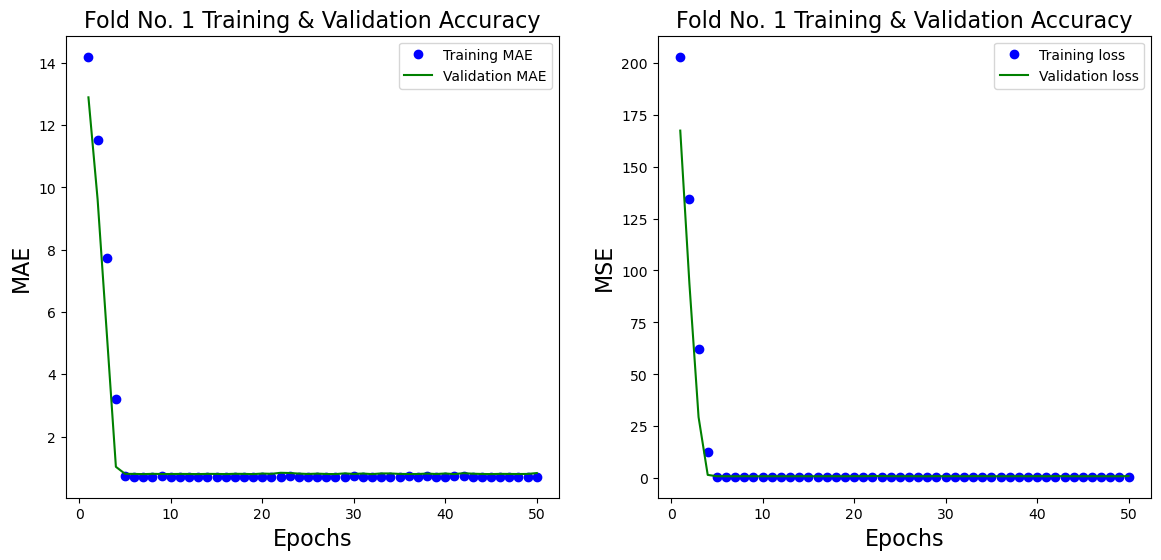

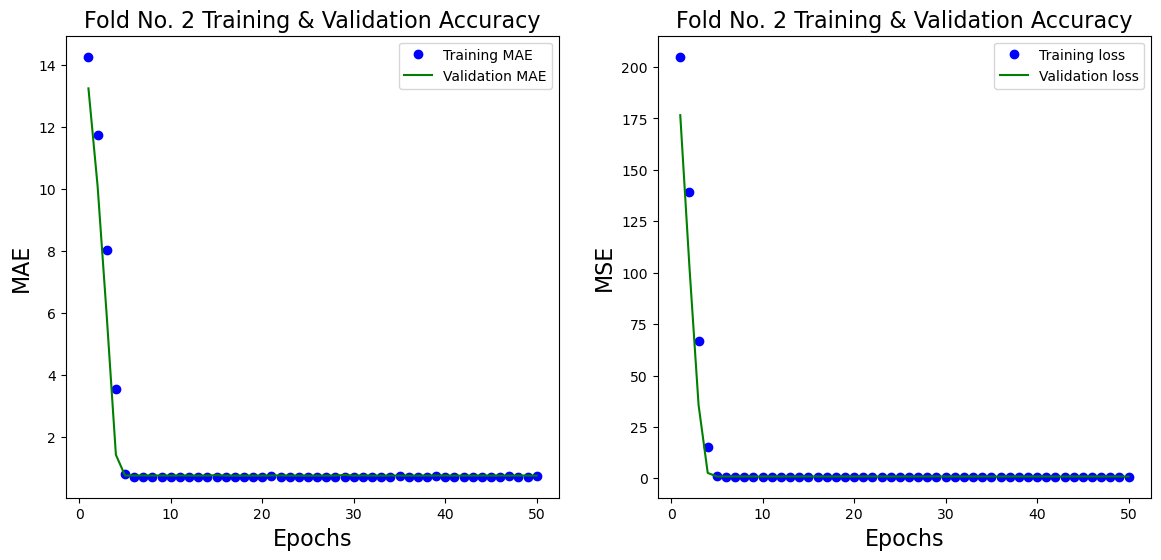

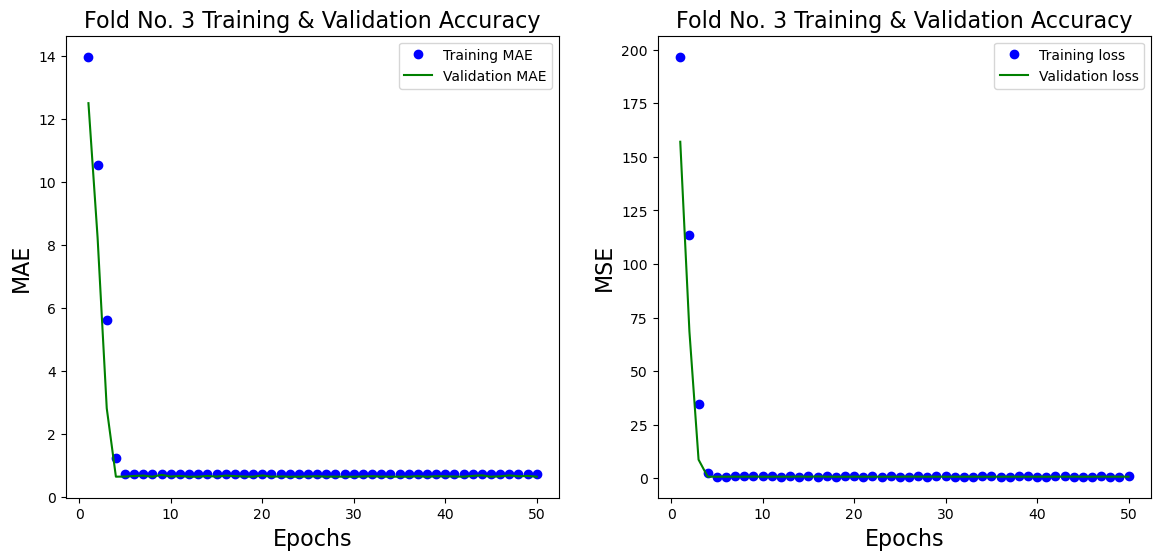

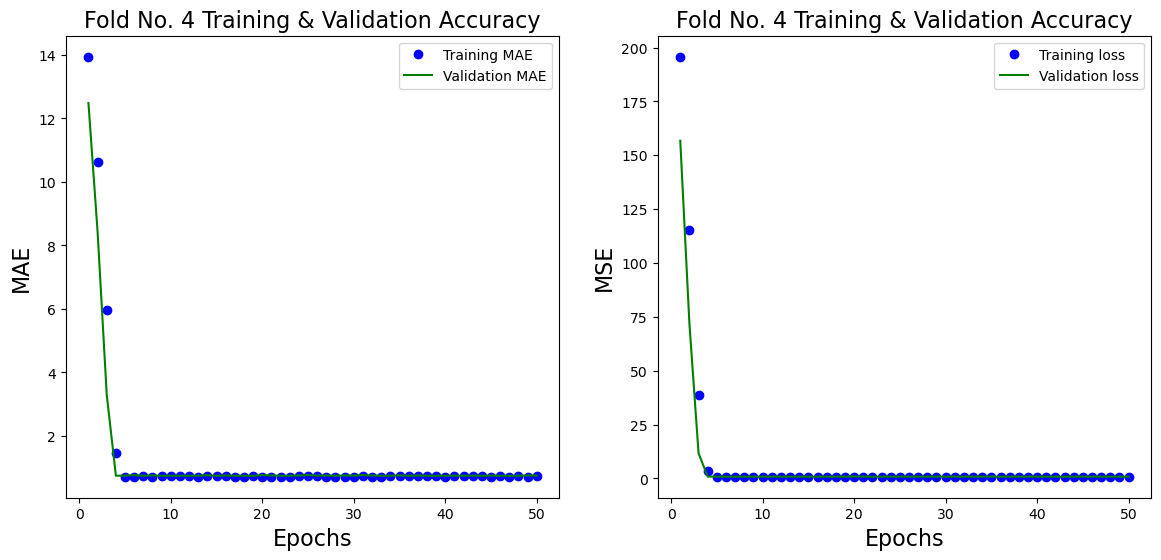

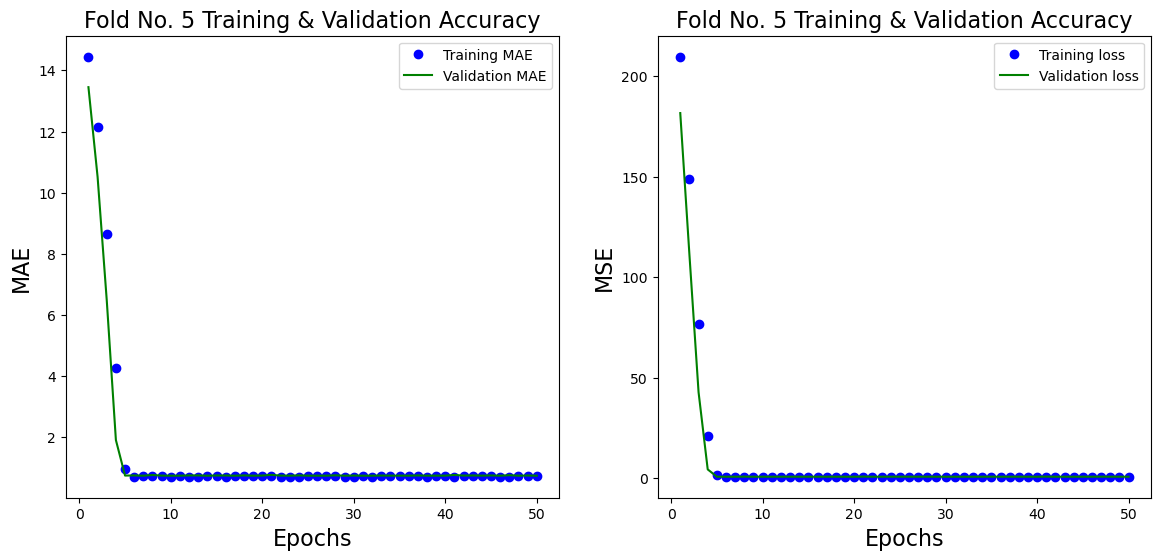

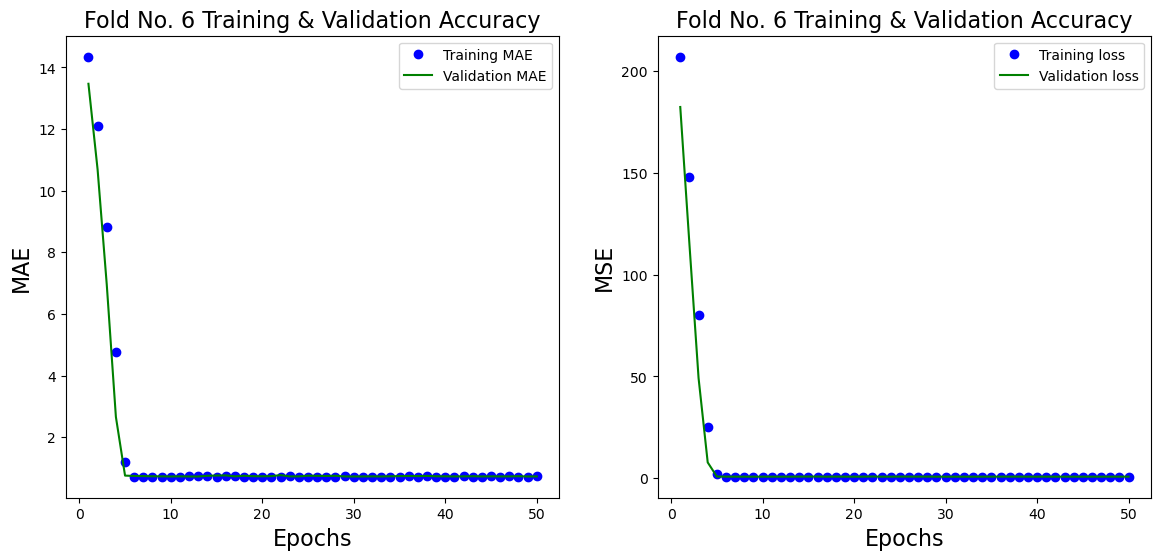

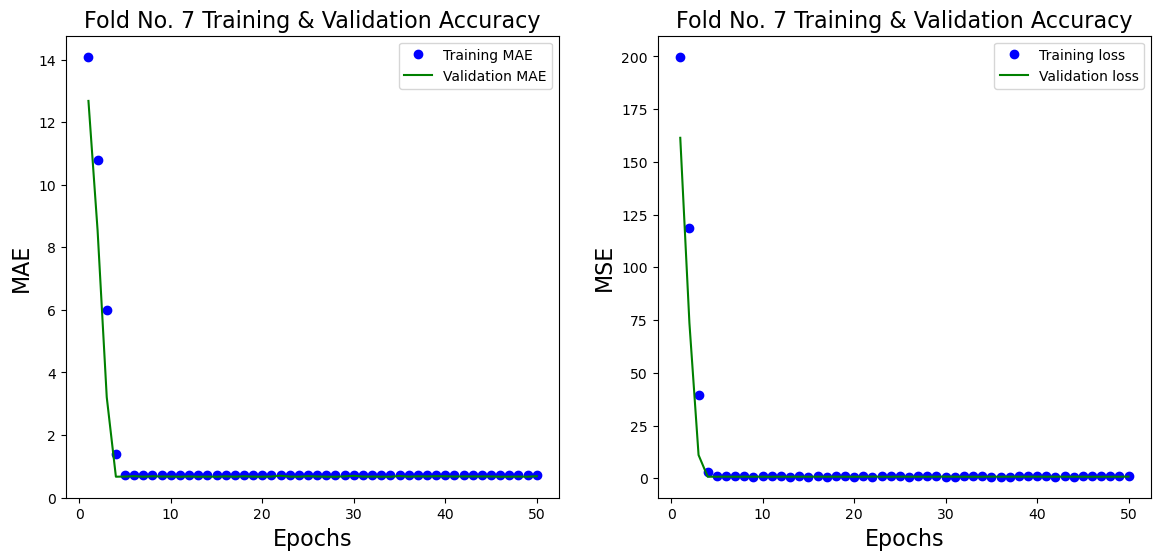

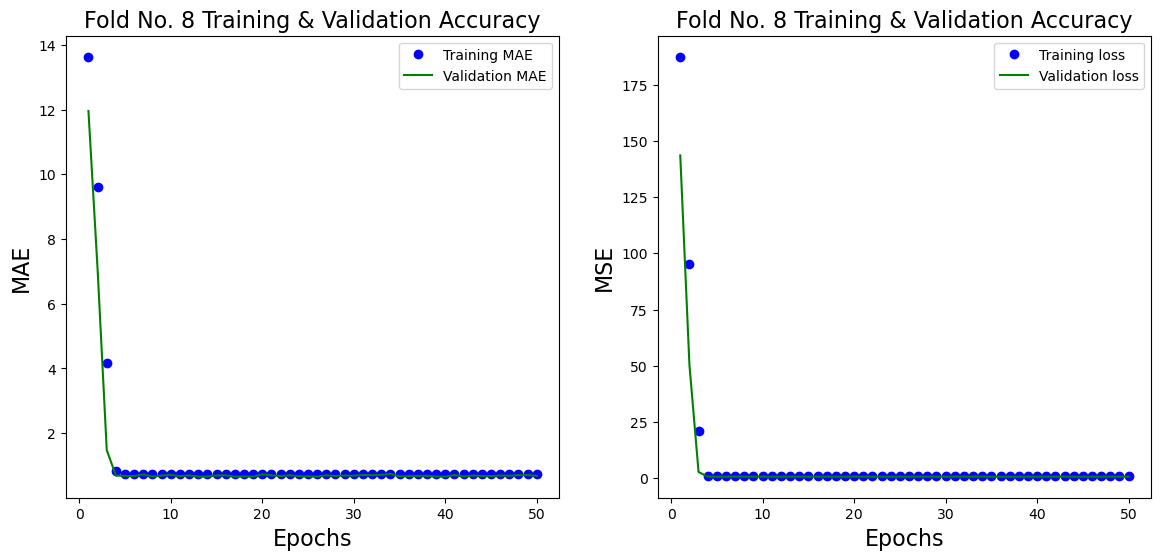

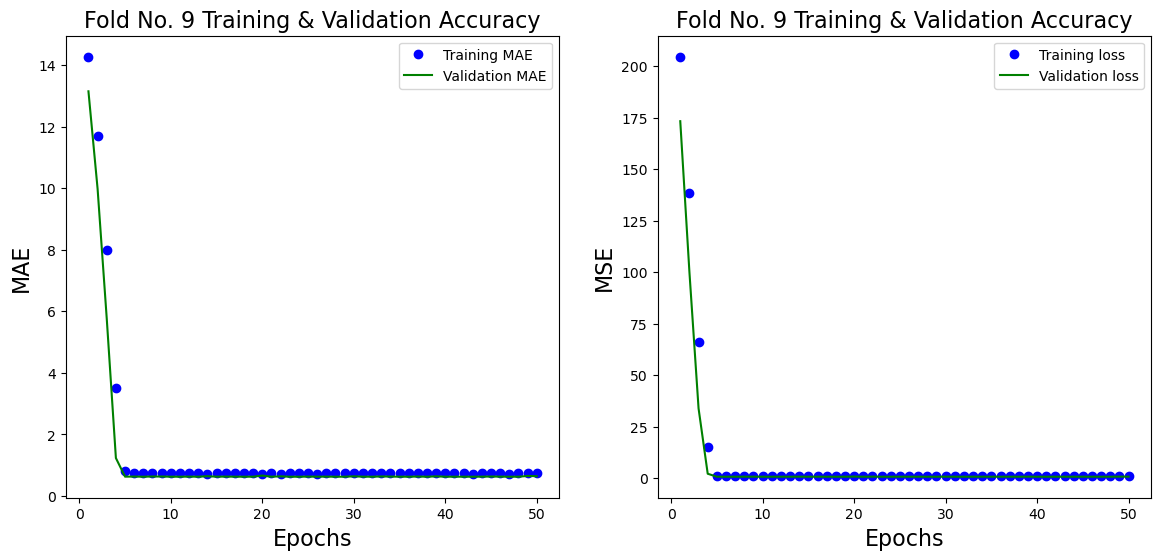

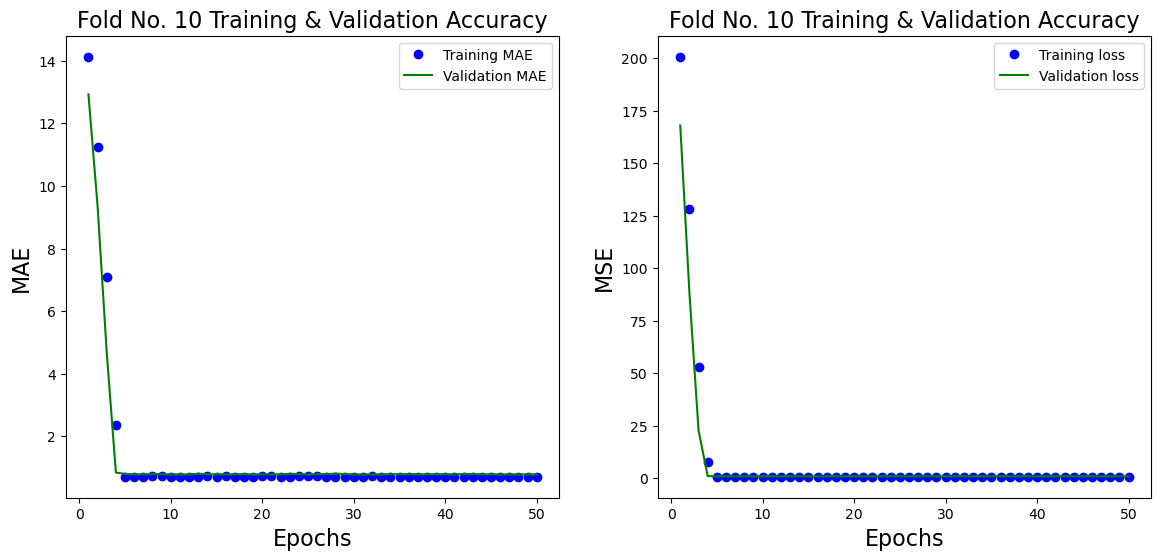

In [13]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the Keras model
    pol_model = Sequential()
    pol_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
    pol_model.add(Dense(20, activation='relu'))
    pol_model.add(Dense(1))

    # Compile model
    pol_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.005),
                loss='mse',
                metrics=['mae'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the network
    pol_model_history = pol_model.fit(inputs[train], targets[train],
                        validation_data=(inputs[test], targets[test]),
                        epochs=50,
                        batch_size=20)

    # Generate generalization metrics
    pol_scores = pol_model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {pol_model.metrics_names[0]} of {pol_scores[0]}; {pol_model.metrics_names[1]} of {pol_scores[1]}')
    pol_mae_per_fold.append(pol_scores[1])
    pol_loss_per_fold.append(pol_scores[0])
   
    # Performance Curves
    history_dict = pol_model_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']
 
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    #
    # Plot the model accuracy (MAE) vs Epochs
    #
    ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
    ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
    ax[0].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('MAE', fontsize=16)
    ax[0].legend()
    #
    # Plot the loss vs Epochs
    #
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
    ax[1].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('MSE', fontsize=16)
    ax[1].legend()
    
    # Increase fold number
    fold_no = fold_no + 1

### Average Scores

In [14]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(pol_mae_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {pol_loss_per_fold[i]} - Mean Absolute Error: {pol_mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Mean Absolute Error: {np.mean(pol_mae_per_fold)} (+- {np.std(pol_mae_per_fold)})')
print(f'> Loss: {np.mean(pol_loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.0720405578613281 - Mean Absolute Error: 0.8274387717247009
------------------------------------------------------------------------
> Fold 2 - Loss: 0.891558825969696 - Mean Absolute Error: 0.7514446973800659
------------------------------------------------------------------------
> Fold 3 - Loss: 0.7311002612113953 - Mean Absolute Error: 0.6512272357940674
------------------------------------------------------------------------
> Fold 4 - Loss: 0.8642578721046448 - Mean Absolute Error: 0.7489876747131348
------------------------------------------------------------------------
> Fold 5 - Loss: 0.7929829955101013 - Mean Absolute Error: 0.7458860278129578
------------------------------------------------------------------------
> Fold 6 - Loss: 0.846158504486084 - Mean Absolute Error: 0.7271470427513123
--------

### Final Training and Save Keras model to Disk

In [15]:
# Define the Keras model
pol_model = Sequential()
pol_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
pol_model.add(Dense(20, activation='relu'))
pol_model.add(Dense(1))

# Compile model
pol_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss='mse',
                metrics=['mae'])


# Fit the network
pol_model_history = pol_model.fit(standardized_data, y,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=20)
    
pickle.dump(pol_model, open(r'.\Models\NI_pol_model.pkl', 'wb'))

Epoch 1/50
67/67 [==============================] - 1s 6ms/step - loss: 226.1434 - mae: 15.0103 - val_loss: 221.2900 - val_mae: 14.8508
Epoch 2/50
67/67 [==============================] - 0s 1ms/step - loss: 216.4136 - mae: 14.6834 - val_loss: 211.0596 - val_mae: 14.5023
Epoch 3/50
67/67 [==============================] - 0s 1ms/step - loss: 205.2701 - mae: 14.2983 - val_loss: 198.9852 - val_mae: 14.0799
Epoch 4/50
67/67 [==============================] - 0s 1ms/step - loss: 192.3572 - mae: 13.8398 - val_loss: 185.2675 - val_mae: 13.5840
Epoch 5/50
67/67 [==============================] - 0s 1ms/step - loss: 177.9521 - mae: 13.3086 - val_loss: 170.1584 - val_mae: 13.0160
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 162.2452 - mae: 12.7054 - val_loss: 153.8932 - val_mae: 12.3754
Epoch 7/50
67/67 [==============================] - 0s 1ms/step - loss: 145.5712 - mae: 12.0305 - val_loss: 136.8127 - val_mae: 11.6649
Epoch 8/50
67/67 [==============================

## Purity Model

### Target "Purity", Train / Test Split and Cross Validation

In [16]:
y = final_df['Pureza']
X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, test_size=0.3, random_state=42)

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

num_folds = 10

# Define per-fold score containers
purity_mae_per_fold = []
purity_loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
60/60 [==============================] - 1s 3ms/step - loss: 7202.3828 - mae: 84.8531 - val_loss: 7126.1187 - val_mae: 84.4014
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 7086.0298 - mae: 84.1645 - val_loss: 6989.4600 - val_mae: 83.5879
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 6929.9839 - mae: 83.2321 - val_loss: 6814.2554 - val_mae: 82.5332
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 6736.3843 - mae: 82.0605 - val_loss: 6602.6372 - val_mae: 81.2411
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 6507.3413 - mae: 80.6526 - val_loss: 6356.7500 - val_mae: 79.7134
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 6245.1030 - mae: 79.0101 - val_loss: 6079.0459 - val_mae: 77.9521
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 595

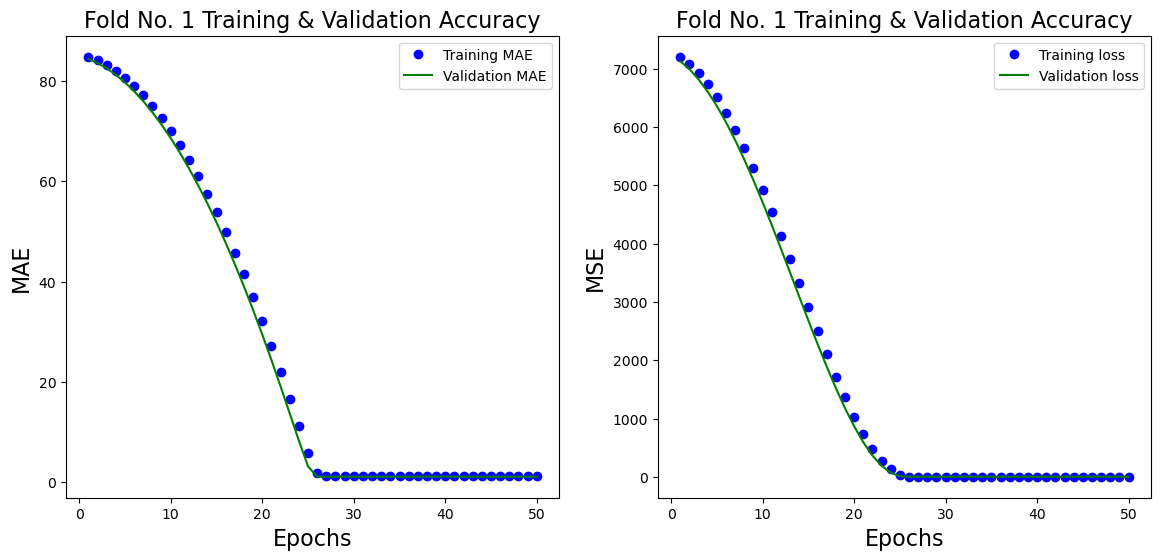

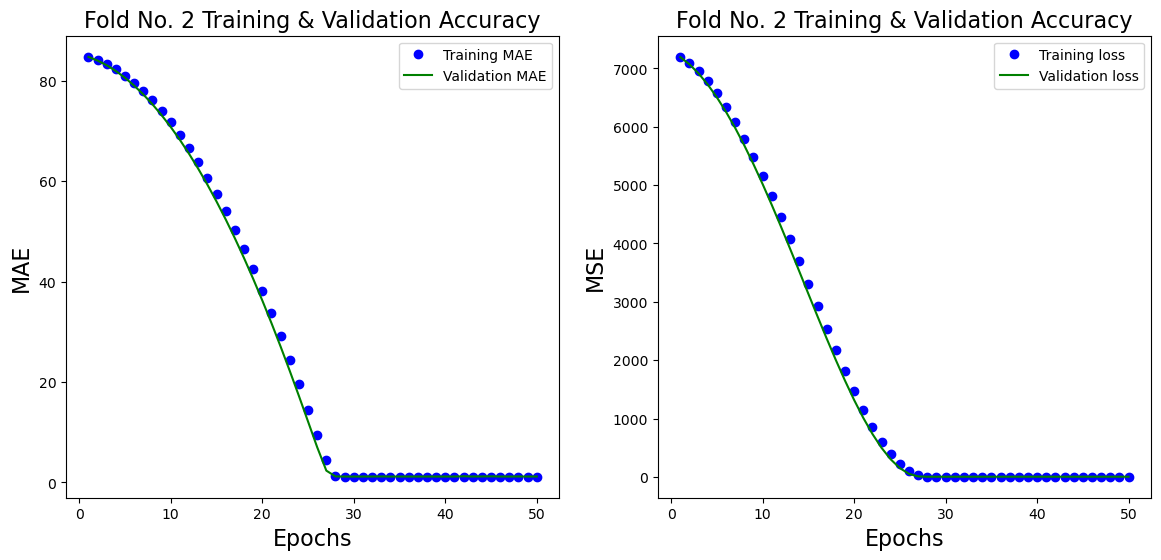

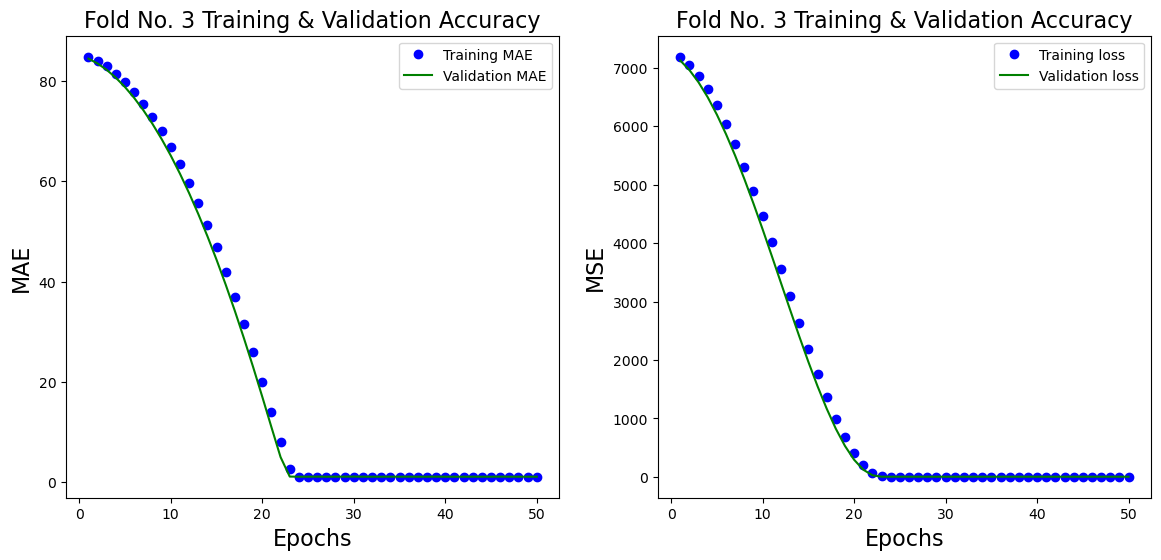

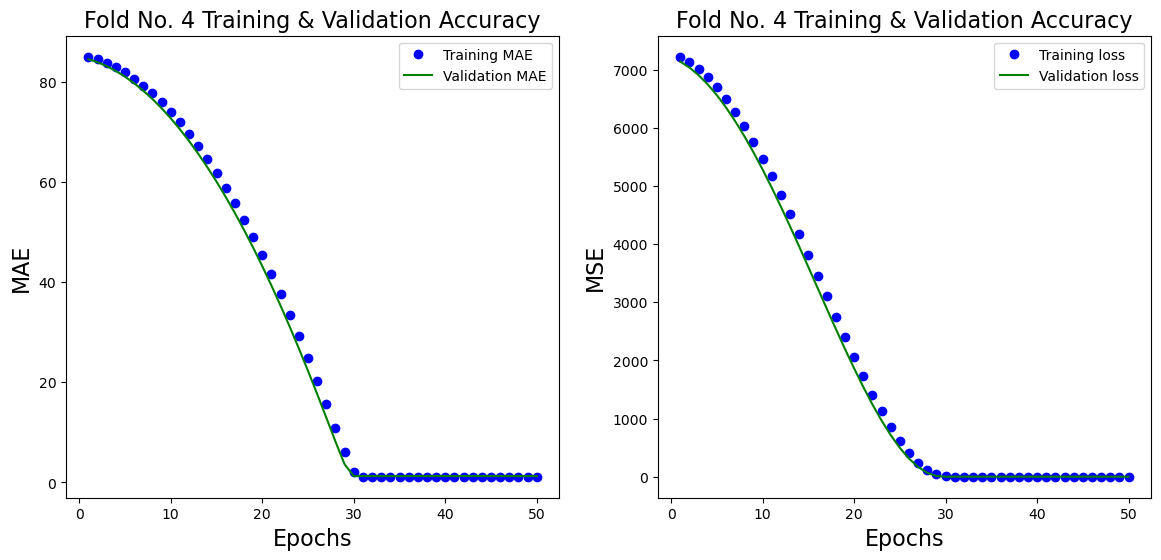

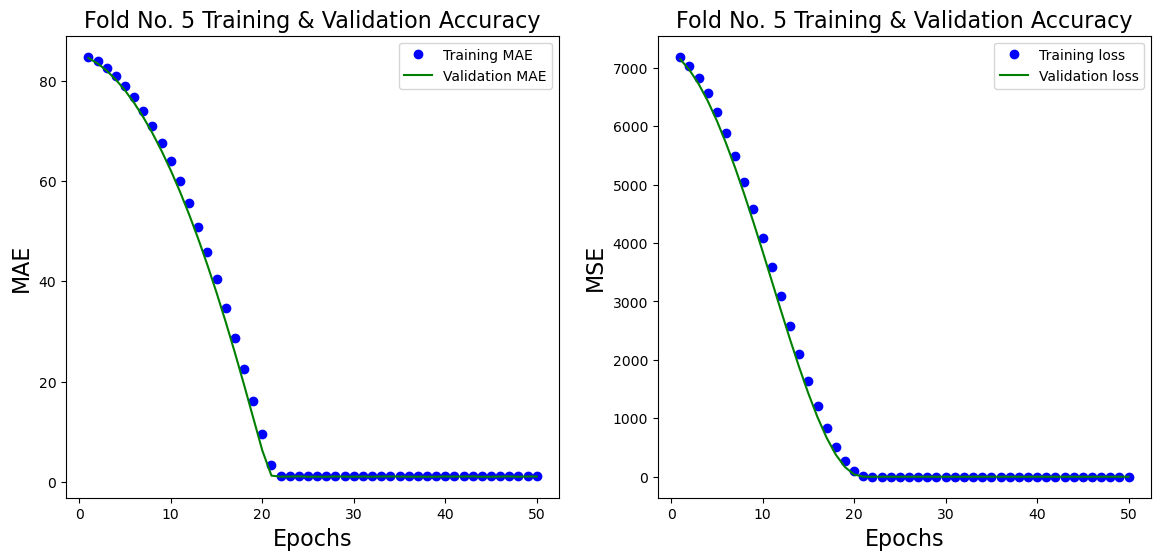

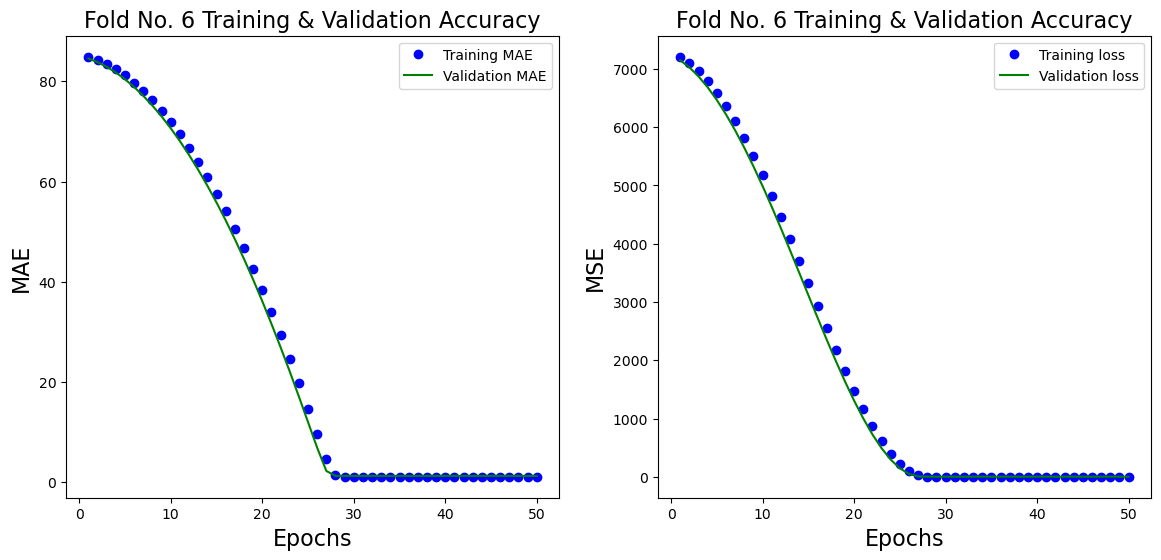

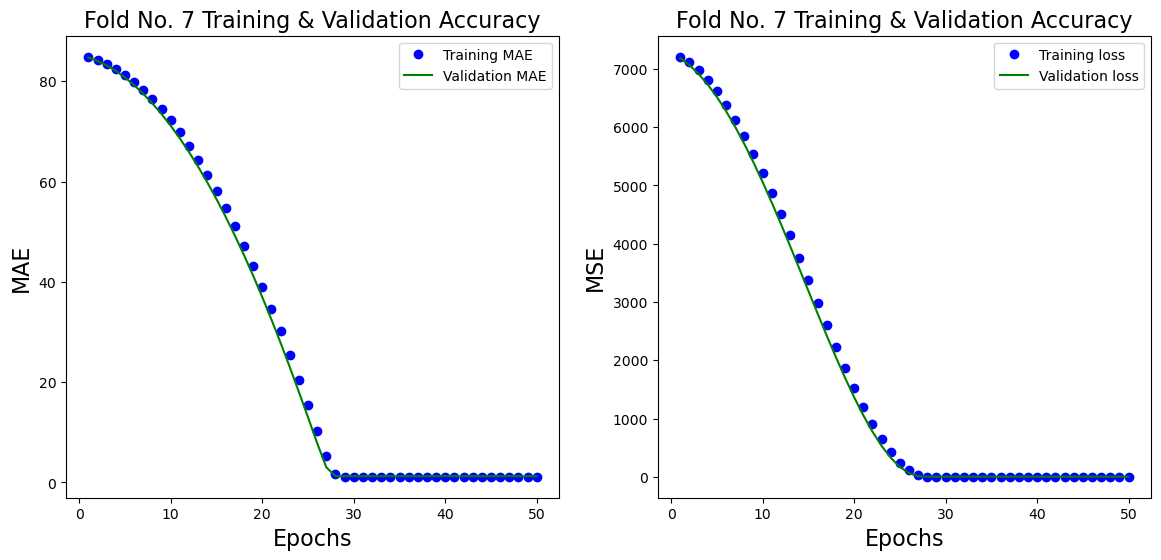

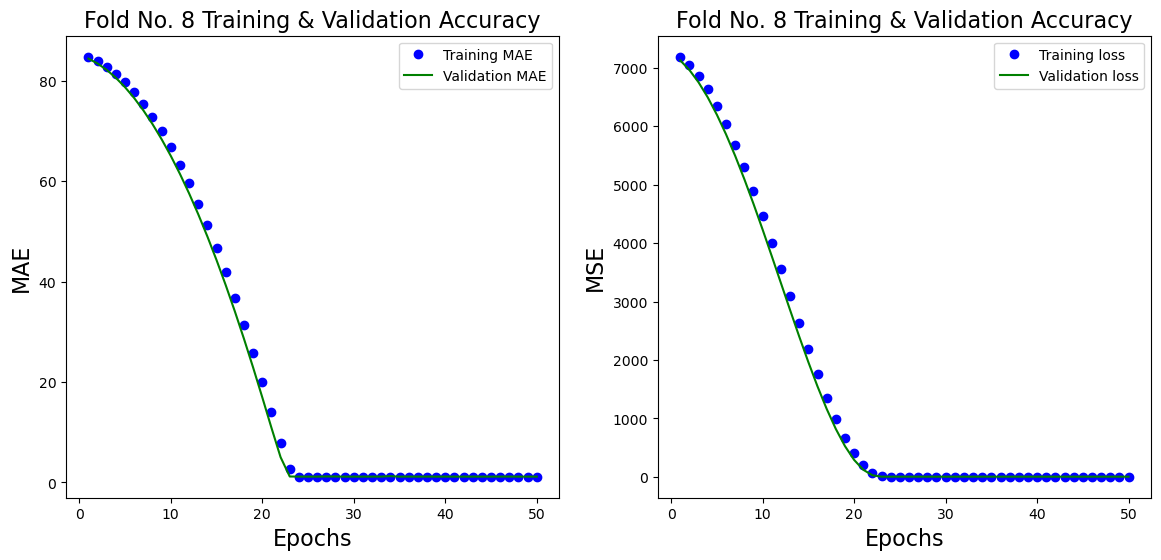

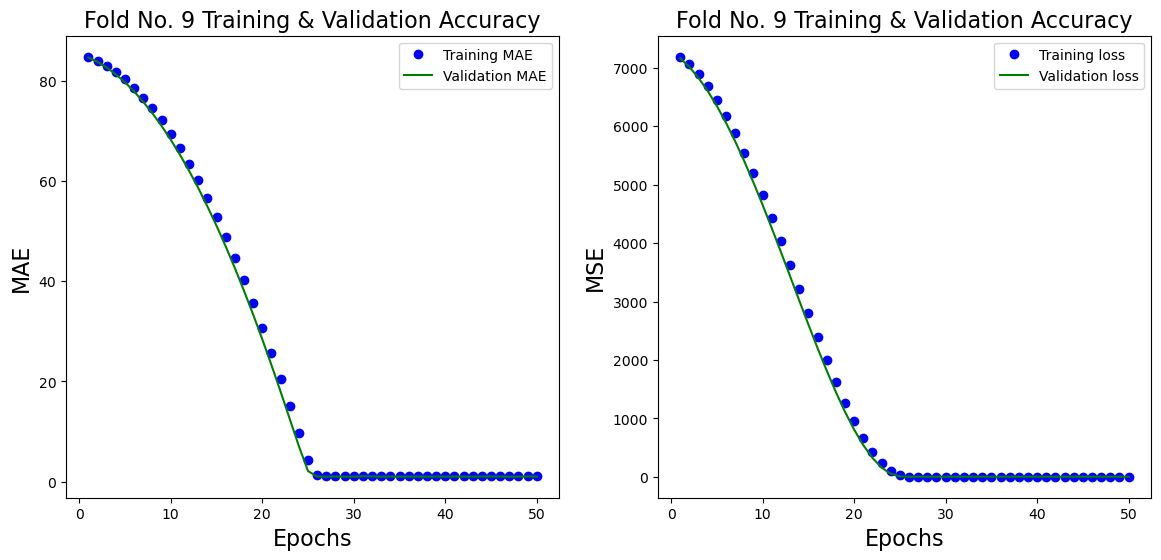

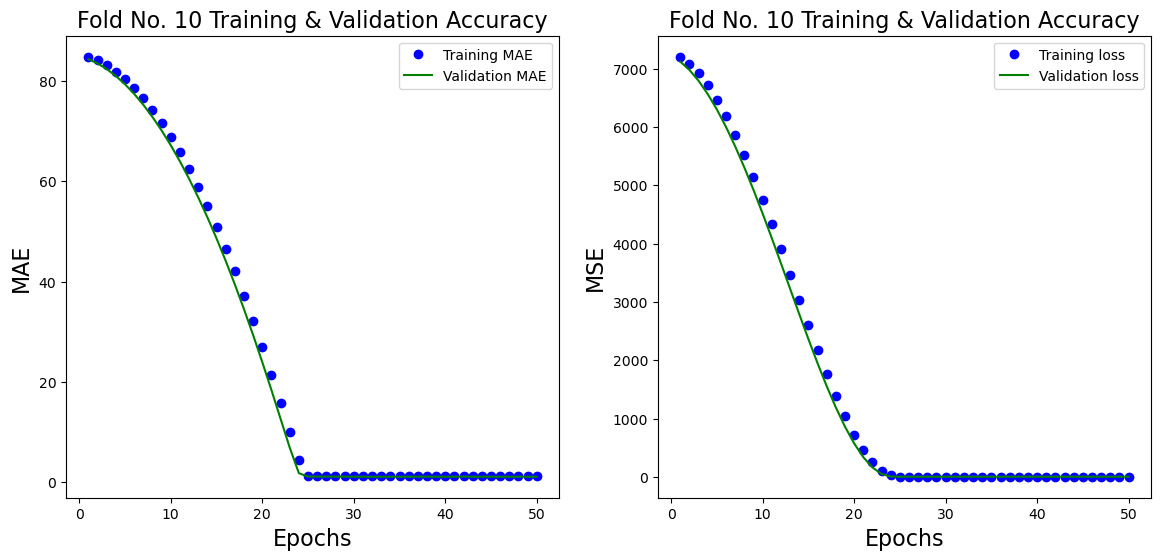

In [17]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the Keras model
    purity_model = Sequential()
    purity_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
    purity_model.add(Dense(20, activation='relu'))
    purity_model.add(Dense(1))

    # Compile model
    purity_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.002),
                loss='mse',
                metrics=['mae'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the network
    purity_model_history = purity_model.fit(inputs[train], targets[train],
                        validation_data=(inputs[test], targets[test]),
                        epochs=50,
                        batch_size=20)

    # Generate generalization metrics
    purity_scores = purity_model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {purity_model.metrics_names[0]} of {purity_scores[0]}; {purity_model.metrics_names[1]} of {purity_scores[1]}')
    purity_mae_per_fold.append(purity_scores[1])
    purity_loss_per_fold.append(purity_scores[0])
   
    # Performance Curves
    history_dict = purity_model_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']
 
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    #
    # Plot the model accuracy (MAE) vs Epochs
    #
    ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
    ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
    ax[0].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('MAE', fontsize=16)
    ax[0].legend()
    #
    # Plot the loss vs Epochs
    #
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
    ax[1].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('MSE', fontsize=16)
    ax[1].legend()
    
    # Increase fold number
    fold_no = fold_no + 1

### Average Scores

In [18]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(purity_mae_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {purity_loss_per_fold[i]} - Mean Absolute Error: {purity_mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Mean Absolute Error: {np.mean(purity_mae_per_fold)} (+- {np.std(purity_mae_per_fold)})')
print(f'> Loss: {np.mean(purity_loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 2.5219995975494385 - Mean Absolute Error: 1.0715148448944092
------------------------------------------------------------------------
> Fold 2 - Loss: 2.312202215194702 - Mean Absolute Error: 1.1866484880447388
------------------------------------------------------------------------
> Fold 3 - Loss: 1.8840128183364868 - Mean Absolute Error: 1.122897982597351
------------------------------------------------------------------------
> Fold 4 - Loss: 3.0096468925476074 - Mean Absolute Error: 1.2546255588531494
------------------------------------------------------------------------
> Fold 5 - Loss: 1.8235788345336914 - Mean Absolute Error: 1.0915765762329102
------------------------------------------------------------------------
> Fold 6 - Loss: 2.6930665969848633 - Mean Absolute Error: 1.2894052267074585
--------

### Final Training and Save Keras model to Disk

In [19]:
# Define the Keras model
purity_model = Sequential()
purity_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
purity_model.add(Dense(20, activation='relu'))
purity_model.add(Dense(1))

# Compile model
purity_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss='mse',
                metrics=['mae'])

# Fit the network
purity_model_history = purity_model.fit(standardized_data, y,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=20)
    
pickle.dump(purity_model, open(r'.\Models\NI_purity_model.pkl', 'wb'))

Epoch 1/50
67/67 [==============================] - 1s 3ms/step - loss: 7215.1987 - mae: 84.9286 - val_loss: 7185.7764 - val_mae: 84.7550
Epoch 2/50
67/67 [==============================] - 0s 1ms/step - loss: 7137.6724 - mae: 84.4709 - val_loss: 7097.6675 - val_mae: 84.2336
Epoch 3/50
67/67 [==============================] - 0s 1ms/step - loss: 7039.0850 - mae: 83.8852 - val_loss: 6988.2183 - val_mae: 83.5814
Epoch 4/50
67/67 [==============================] - 0s 1ms/step - loss: 6919.5625 - mae: 83.1696 - val_loss: 6858.2192 - val_mae: 82.8001
Epoch 5/50
67/67 [==============================] - 0s 1ms/step - loss: 6779.8423 - mae: 82.3252 - val_loss: 6708.3711 - val_mae: 81.8902
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 6620.6631 - mae: 81.3528 - val_loss: 6539.4902 - val_mae: 80.8524
Epoch 7/50
67/67 [==============================] - 0s 1ms/step - loss: 6442.9663 - mae: 80.2530 - val_loss: 6352.5508 - val_mae: 79.6880
Epoch 8/50
67/67 [================

## Yield Model

### Target "Yield", Train / Test Split and Cross Validation

In [20]:
y = final_df['Redimiento']
X_train, X_test, y_train, y_test = train_test_split(standardized_data, y, test_size=0.3, random_state=42)

# Merge inputs and targets
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

num_folds = 10

# Define per-fold score containers
yield_mae_per_fold = []
yield_loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

### Keras Neural Network Design for Regression

- The neural network will consist of dense layers or fully connected layers. Fully connected layers are those in which each of the nodes of one layer is connected to every other nodes in the next layer.
- First hidden layer will be configured with input_shape having same value as number of input features.
- The final layer would not need to have activation function set as the expected output or prediction needs to be a continuous numerical value.
- The final layer would need to have just one node.

The neural network would need to be configured with an optimizer function, loss function and an accuracy metric. For the regression problem, the loss function is set to be the **mean squared error (mse)** function which is nothing but the square of the difference between the predictions and the targets. The accuracy metric will be **mean absolute error (mae)** which is noting but the absolute value of the difference between the predictions and the targets.

For the optimization algorithm, we use RMSprop.

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/50
60/60 [==============================] - 1s 3ms/step - loss: 14523.2627 - mae: 120.2816 - val_loss: 13460.2227 - val_mae: 115.7859
Epoch 2/50
60/60 [==============================] - 0s 1ms/step - loss: 11881.1621 - mae: 108.6746 - val_loss: 10213.3633 - val_mae: 100.7944
Epoch 3/50
60/60 [==============================] - 0s 1ms/step - loss: 8286.0322 - mae: 90.5549 - val_loss: 6376.4131 - val_mae: 79.5146
Epoch 4/50
60/60 [==============================] - 0s 1ms/step - loss: 4525.2314 - mae: 66.4790 - val_loss: 2825.2974 - val_mae: 52.6446
Epoch 5/50
60/60 [==============================] - 0s 1ms/step - loss: 1545.8030 - mae: 37.5491 - val_loss: 553.8710 - val_mae: 22.3612
Epoch 6/50
60/60 [==============================] - 0s 1ms/step - loss: 180.2345 - mae: 11.0056 - val_loss: 54.8420 - val_mae: 5.7582
Epoch 7/50
60/60 [==============================] - 0s 1ms/step - loss: 

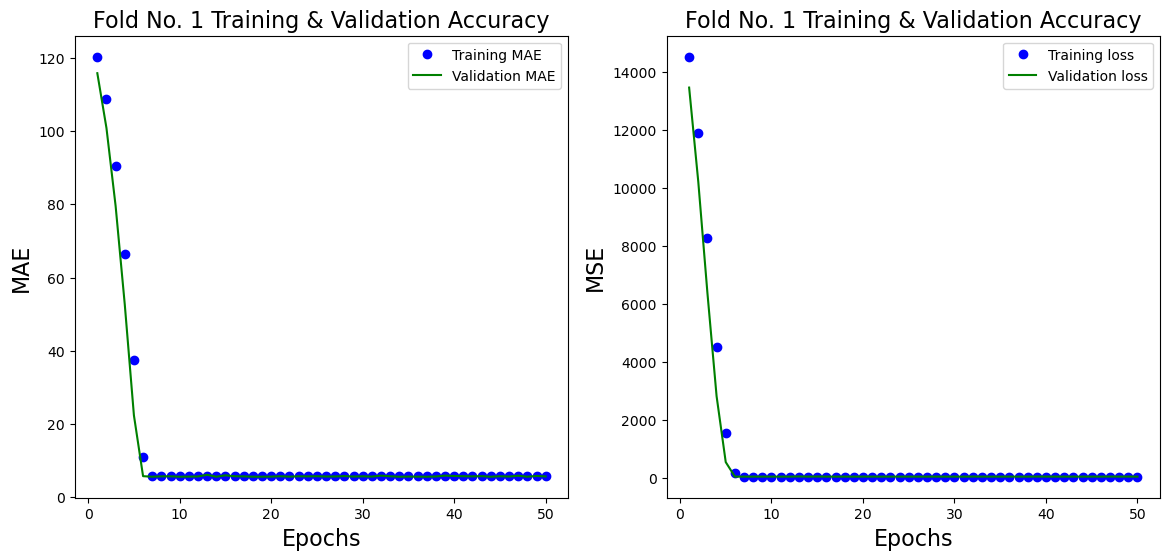

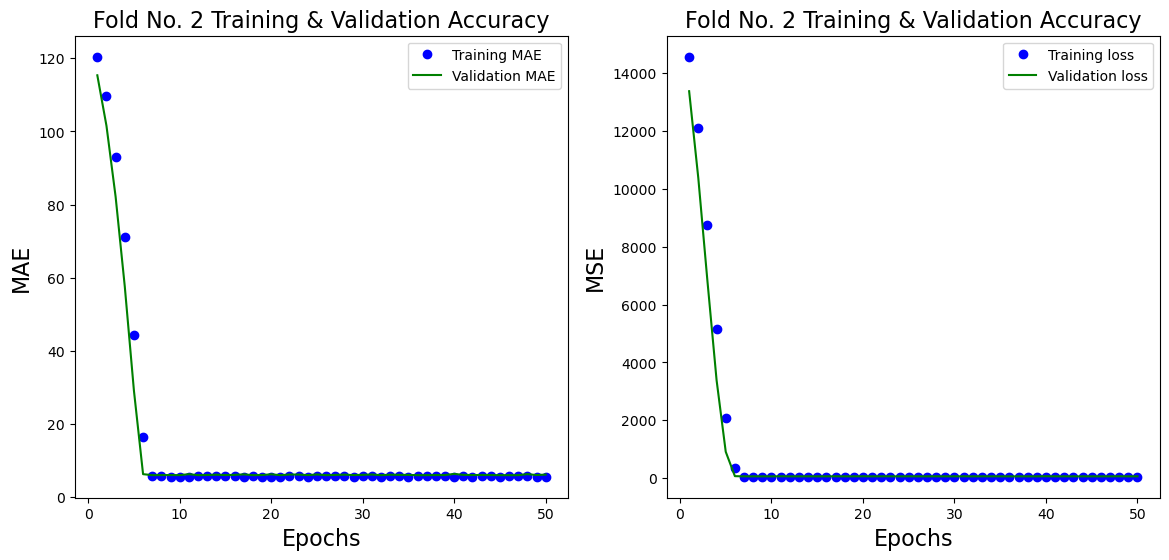

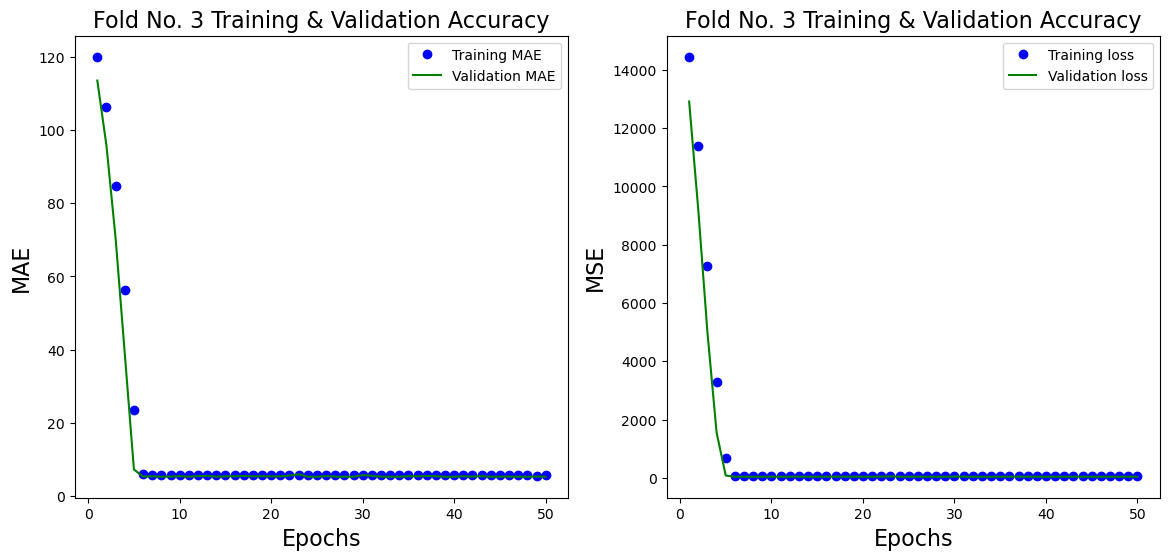

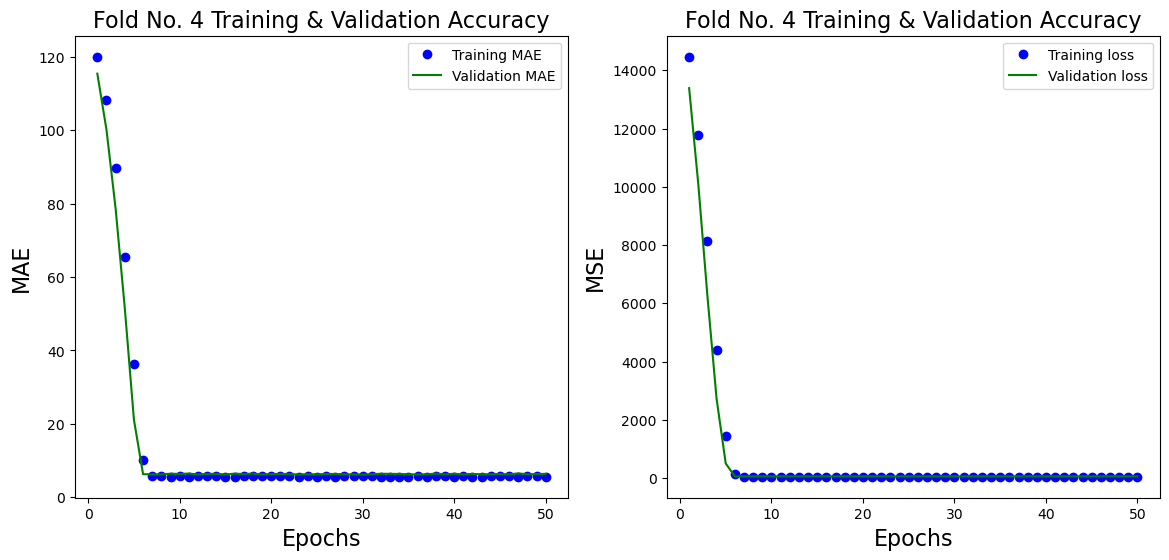

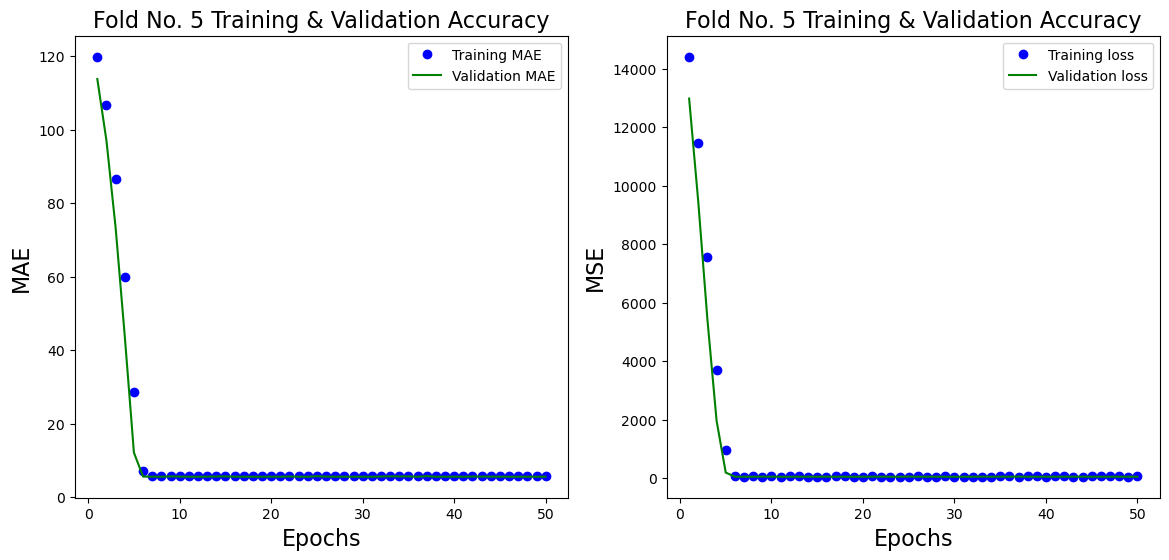

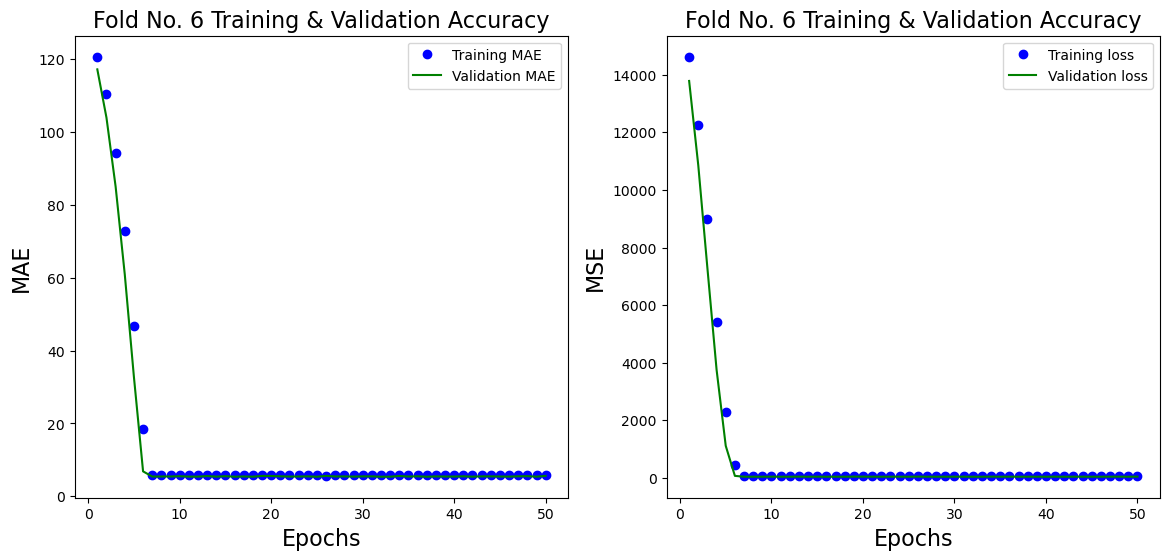

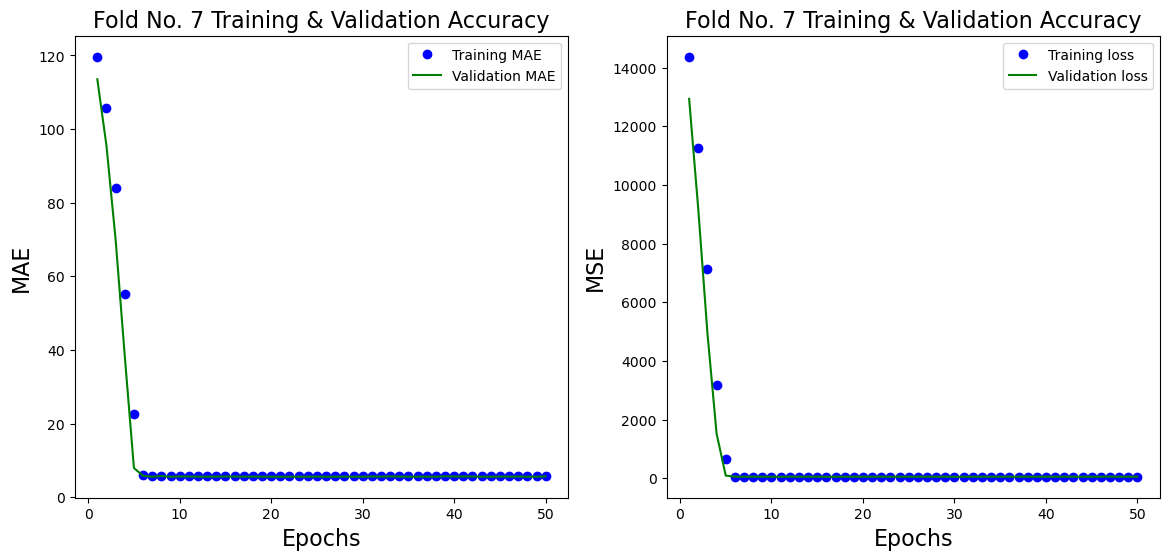

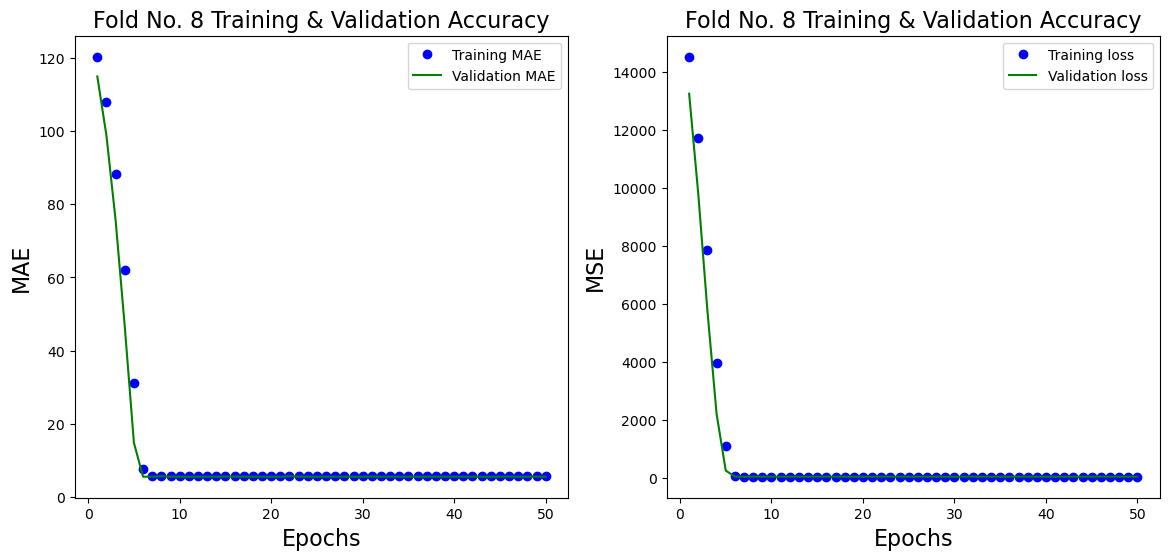

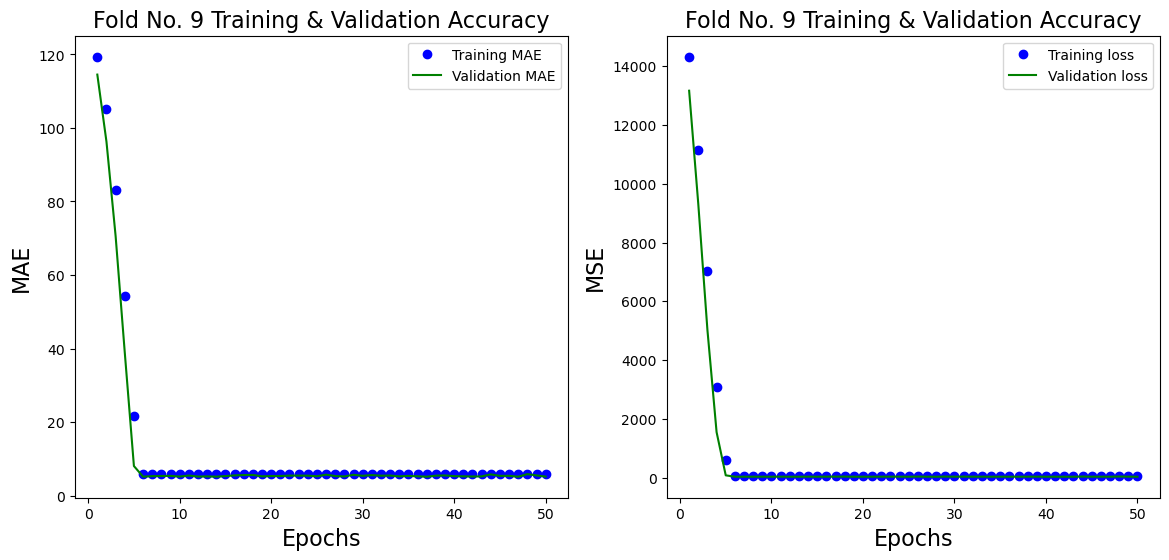

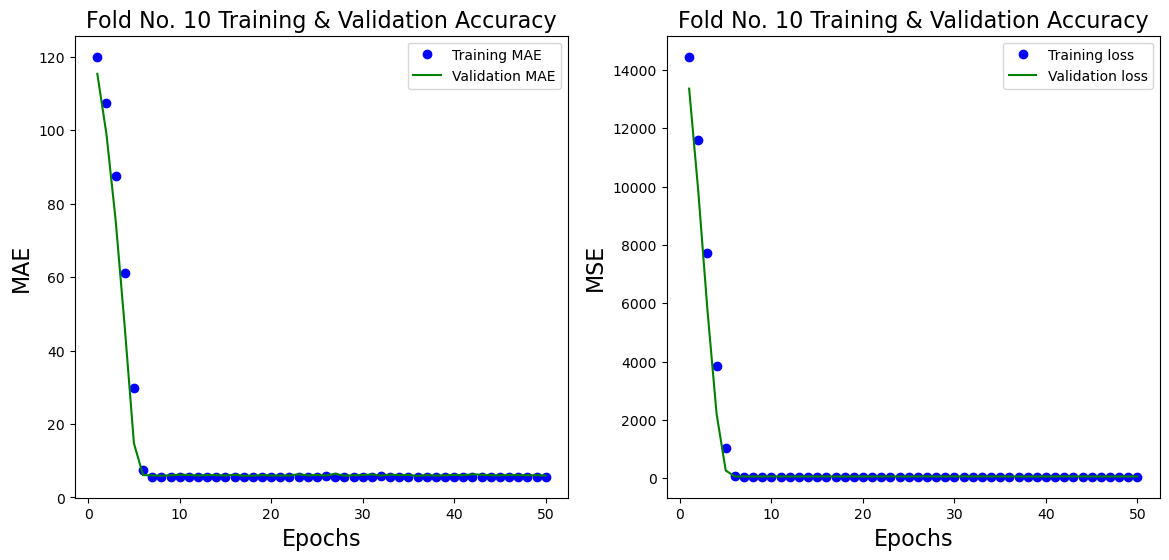

In [21]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    # Define the Keras model
    yield_model = Sequential()
    yield_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
    yield_model.add(Dense(20, activation='relu'))
    yield_model.add(Dense(1))

    # Compile model
    yield_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
                loss='mse',
                metrics=['mae'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit the network
    yield_model_history = yield_model.fit(inputs[train], targets[train],
                        validation_data=(inputs[test], targets[test]),
                        epochs=50,
                        batch_size=20)

    # Generate generalization metrics
    yield_scores = yield_model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {yield_model.metrics_names[0]} of {yield_scores[0]}; {yield_model.metrics_names[1]} of {yield_scores[1]}')
    yield_mae_per_fold.append(yield_scores[1])
    yield_loss_per_fold.append(yield_scores[0])
   
    # Performance Curves
    history_dict = yield_model_history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    accuracy = history_dict['mae']
    val_accuracy = history_dict['val_mae']
 
    epochs = range(1, len(loss_values) + 1)
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    #
    # Plot the model accuracy (MAE) vs Epochs
    #
    ax[0].plot(epochs, accuracy, 'bo', label='Training MAE')
    ax[0].plot(epochs, val_accuracy, 'g', label='Validation MAE')
    ax[0].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[0].set_xlabel('Epochs', fontsize=16)
    ax[0].set_ylabel('MAE', fontsize=16)
    ax[0].legend()
    #
    # Plot the loss vs Epochs
    #
    ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
    ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
    ax[1].set_title('Fold No. %d Training & Validation Accuracy' % fold_no, fontsize=16)
    ax[1].set_xlabel('Epochs', fontsize=16)
    ax[1].set_ylabel('MSE', fontsize=16)
    ax[1].legend()
    
    # Increase fold number
    fold_no = fold_no + 1

### Average Scores

In [22]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(yield_mae_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {yield_loss_per_fold[i]} - Mean Absolute Error: {yield_mae_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Mean Absolute Error: {np.mean(yield_mae_per_fold)} (+- {np.std(yield_mae_per_fold)})')
print(f'> Loss: {np.mean(yield_loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 54.099853515625 - Mean Absolute Error: 5.688294410705566
------------------------------------------------------------------------
> Fold 2 - Loss: 63.8623046875 - Mean Absolute Error: 6.183485984802246
------------------------------------------------------------------------
> Fold 3 - Loss: 43.400753021240234 - Mean Absolute Error: 5.362163066864014
------------------------------------------------------------------------
> Fold 4 - Loss: 61.154296875 - Mean Absolute Error: 6.358503341674805
------------------------------------------------------------------------
> Fold 5 - Loss: 45.55427932739258 - Mean Absolute Error: 5.5298686027526855
------------------------------------------------------------------------
> Fold 6 - Loss: 44.96487045288086 - Mean Absolute Error: 5.602104663848877
---------------------------

### Final Training and Save Keras model to Disk

In [23]:
# Define the Keras model
yield_model = Sequential()
yield_model.add(Dense(10, input_shape=(X.shape[1],), activation='relu'))
yield_model.add(Dense(20, activation='relu'))
yield_model.add(Dense(1))

# Compile model
yield_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
                loss='mse',
                metrics=['mae'])


# Fit the network
yield_model_history = yield_model.fit(standardized_data, y,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=20)
    
pickle.dump(yield_model, open(r'.\Models\NI_yield_model.pkl', 'wb'))

Epoch 1/50
67/67 [==============================] - 1s 3ms/step - loss: 14336.6514 - mae: 119.4877 - val_loss: 12890.6660 - val_mae: 113.3295
Epoch 2/50
67/67 [==============================] - 0s 1ms/step - loss: 10988.7520 - mae: 104.4331 - val_loss: 8809.1377 - val_mae: 93.6058
Epoch 3/50
67/67 [==============================] - 0s 1ms/step - loss: 6603.0591 - mae: 80.5334 - val_loss: 4344.8770 - val_mae: 65.5575
Epoch 4/50
67/67 [==============================] - 0s 1ms/step - loss: 2550.6191 - mae: 49.0143 - val_loss: 1000.2281 - val_mae: 30.8729
Epoch 5/50
67/67 [==============================] - 0s 1ms/step - loss: 339.5239 - mae: 15.3813 - val_loss: 47.6052 - val_mae: 5.5605
Epoch 6/50
67/67 [==============================] - 0s 1ms/step - loss: 51.3342 - mae: 5.6905 - val_loss: 47.1658 - val_mae: 5.5291
Epoch 7/50
67/67 [==============================] - 0s 1ms/step - loss: 51.7967 - mae: 5.7275 - val_loss: 48.6060 - val_mae: 5.6221
Epoch 8/50
67/67 [==========================